In [1]:
library(spatstat)
library(sf)
options(repr.plot.width=16, repr.plot.height=8)  # opciones para los plots

Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.2-1

Loading required package: spatstat.random

spatstat.random 3.1-5

Loading required package: spatstat.explore

Loading required package: nlme

spatstat.explore 3.2-1

Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.2-4

Loading required package: spatstat.linnet

spatstat.linnet 3.1-1


spatstat 3.0-6 
For an introduction to spatstat, type ‘beginner’ 


Linking to GEOS 3.10.2, GDAL 3.6.2, PROJ 9.1.1; sf_use_s2() is TRUE



In [2]:
ma <- read.csv("muestreo_aleatorio.csv")
mr <- read.csv("muestreo_regular.csv")
cuencas <- st_read("vectores/Cuencas_BNA.shp")
cuenca <- subset(cuencas, COD_CUEN=="070")
cuenca_s <- st_simplify(cuenca, dTolerance=10) |> st_make_valid()

Reading layer `Cuencas_BNA' from data source 
  `/home/jovyan/PUC/teledeteccion_ambiental/taller_02/vectores/Cuencas_BNA.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 139 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -3701590 ymin: 3733340 xmax: 704806.4 ymax: 8065244
Projected CRS: WGS 84 / UTM zone 19S


¿Con qué datos voy a trabajar?

In [35]:
dat <- mr
head(dat)

id   x        y       ndvi      evi       elevation slope     aspect   
1 4519 219165.3 6154700 0.8337729 0.3153590  86.74299 15.964077 186.06134
2 4520 219465.3 6154700 0.7304794 0.3559290 129.70528  8.323690 295.22330
3 4741 219165.3 6154400 0.4439436 0.2333511  44.24082 17.417210  26.56792
4 4742 219465.3 6154400 0.8498704 0.3750226  93.65138 20.117327 272.31796
5 4743 219765.3 6154400 0.8646656 0.3170178 168.69920 29.871904 261.80417
6 4744 220065.3 6154400 0.8666237 0.3815171 264.81482  4.736786 253.85594
  aspect_sin aspect_cos 
1 -0.1055931 -0.99440942
2 -0.9046539  0.42614717
3  0.4472584  0.89440481
4 -0.9991818  0.04044505
5 -0.9897866 -0.14255692
6 -0.9605656 -0.27805337

Es importante filtrar los datos primero. Recuerde utilizar el mismo número de puntos tanto en el muestreo aleatorio como regular.

In [4]:
nrow(mr)

[1] 6818

In [5]:
nrow(ma)

[1] 10000

In [34]:
set.seed(8925146)
# s <- subset(dat, ndvi > 0 & aspect != -1)[sample(nrow(mr)), ]  # Crear subconjunto de datos, sólo para los puntos aleatorios
s <- dat

print(dim(dat))
print(dim(s))

[1] 10000    10
[1] 10000    10


In [7]:
cx <- s$x # crear vector con coordenadas x desde t
cy <- s$y # crear vector con coorfenadas y desde t

Obtener un resumen general de las coordenadas (valores mínimos, máximos, etc)

In [8]:
print(summary(cx))
print(summary(cy))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 208956  218201  225915  227215  235646  250757 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
6125678 6131938 6135658 6136149 6139909 6154537 


Planar point pattern:  6818 points
Average intensity 5.651786e-06 points per square meter

Coordinates are given to 1 decimal place
i.e. rounded to the nearest multiple of 0.1 meters

Window: rectangle = [208955.91, 250757.32] x [6125678, 6154537] meters
                    (41800 x 28860 meters)
Window area = 1206340000 square meters
Unit of length: 1 meter

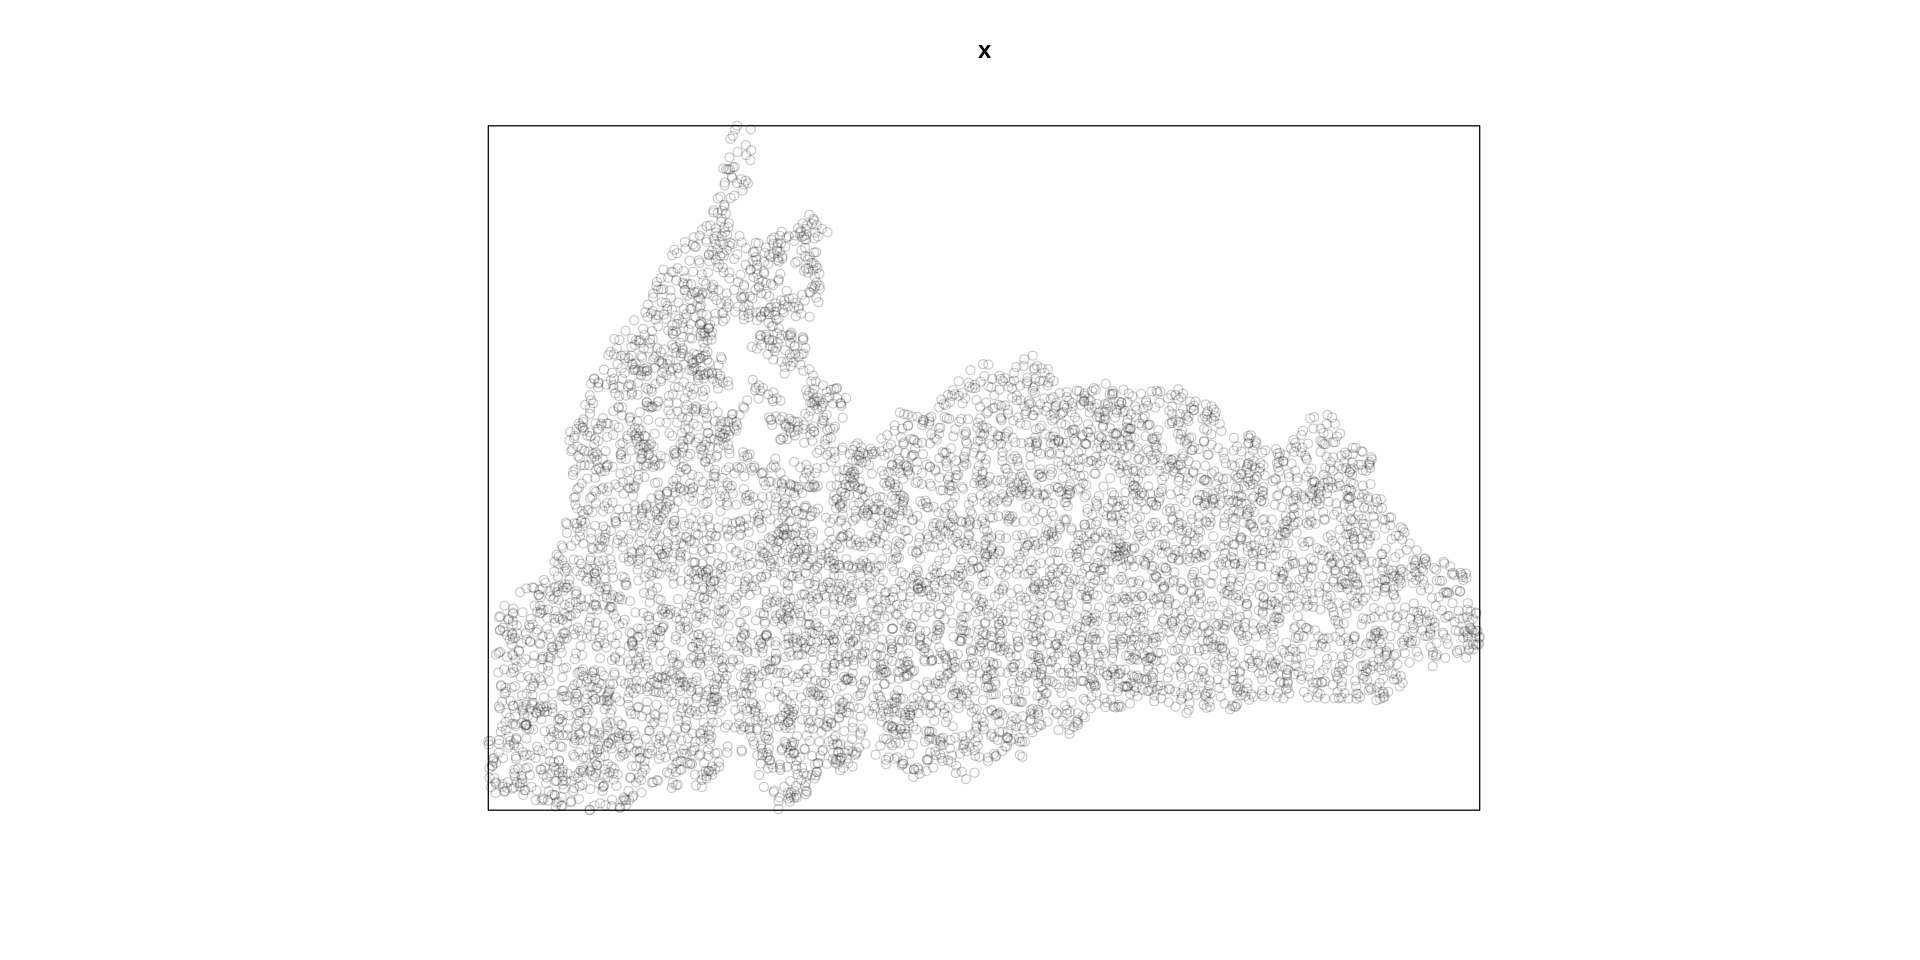

In [9]:
x <- ppp(cx, cy, range(cx), range(cy))
unitname(x) <- c("meter", "meters") # asignar sistema de medidas metros a x e y
plot(x) # plotear object PPP
summary(x)

Anteriormente no se consideró información complementaria, sólo la ubicación espacial. Ahora agreguemos intensidad (mark), de acuerdo a un atributo en particular.

Marked planar point pattern:  6818 points
Average intensity 5.651786e-06 points per square meter

Coordinates are given to 1 decimal place
i.e. rounded to the nearest multiple of 0.1 meters

marks are numeric, of type ‘double’
Summary:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001099 0.282108 0.448072 0.492544 0.712131 0.930196 

Window: rectangle = [208955.91, 250757.32] x [6125678, 6154537] meters
                    (41800 x 28860 meters)
Window area = 1206340000 square meters
Unit of length: 1 meter

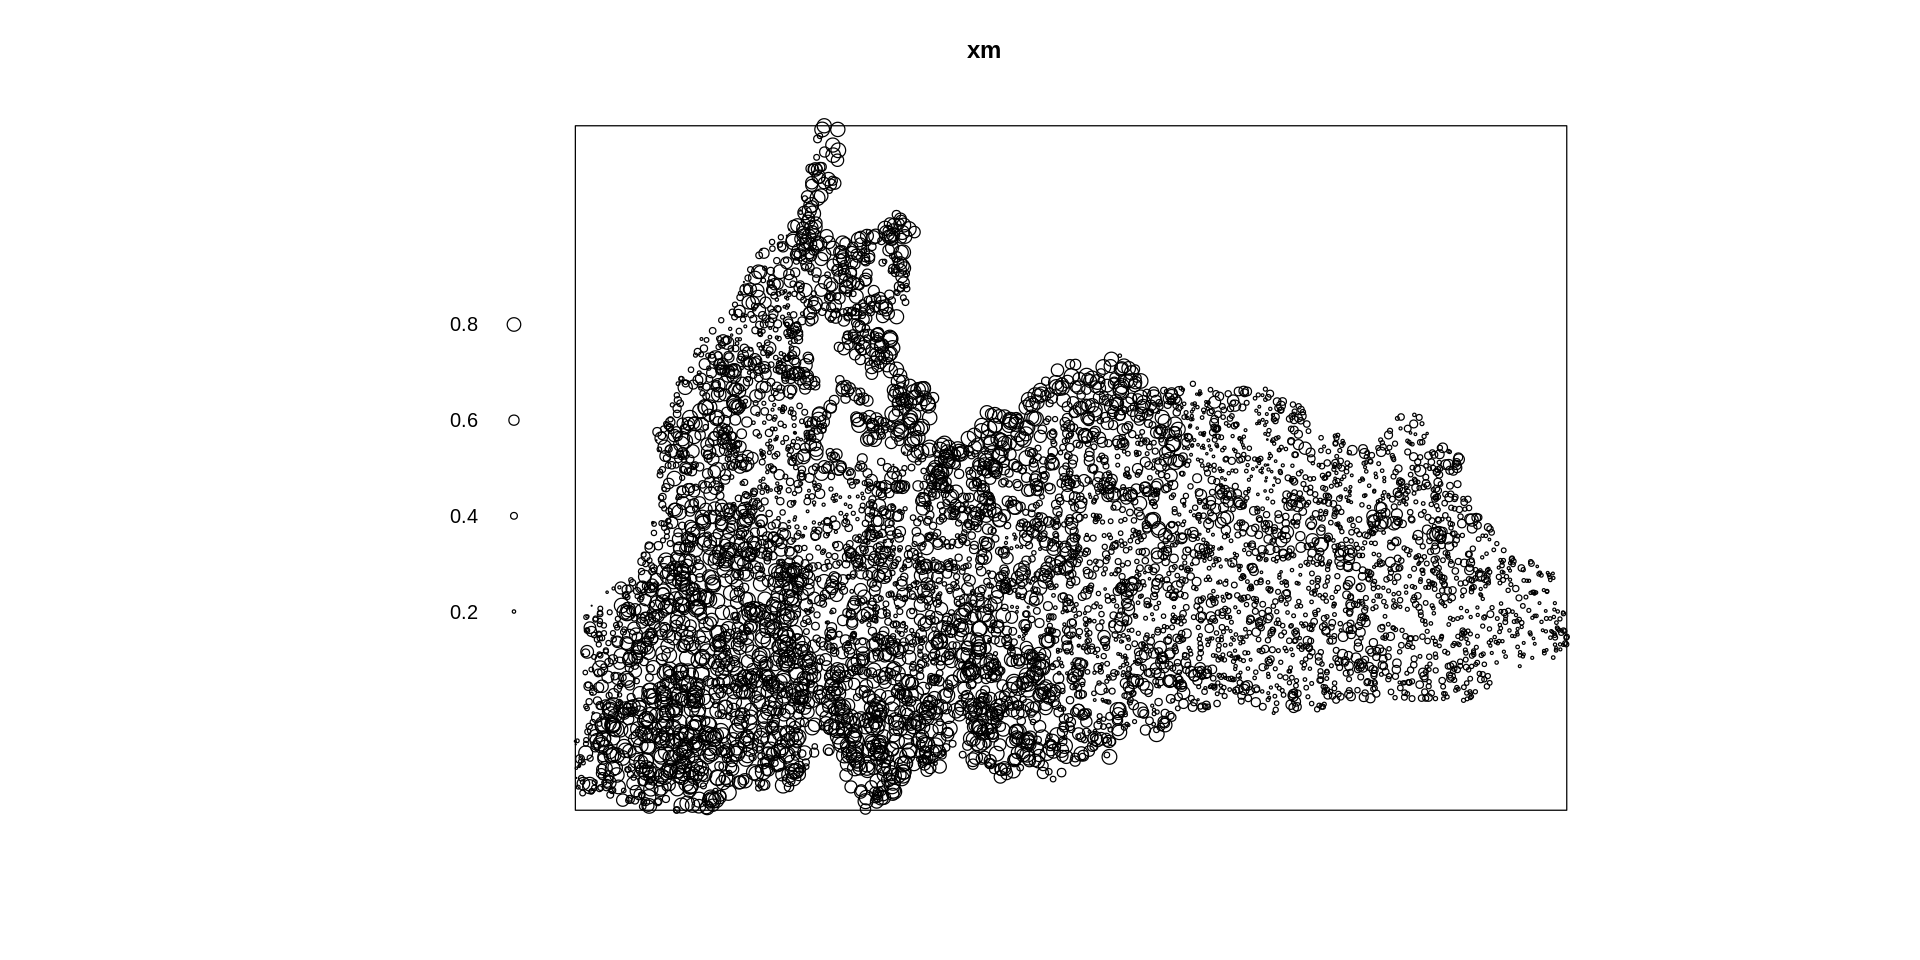

In [10]:
xm <- ppp(cx, cy, range(cx), range(cy), marks = s$ndvi)
unitname(xm) <- c("meter", "meters") # asignar tipo de medida
plot(xm) # plotear objecto PPP
summary(xm) # Resumir el objeto Xm de patrones de puntos

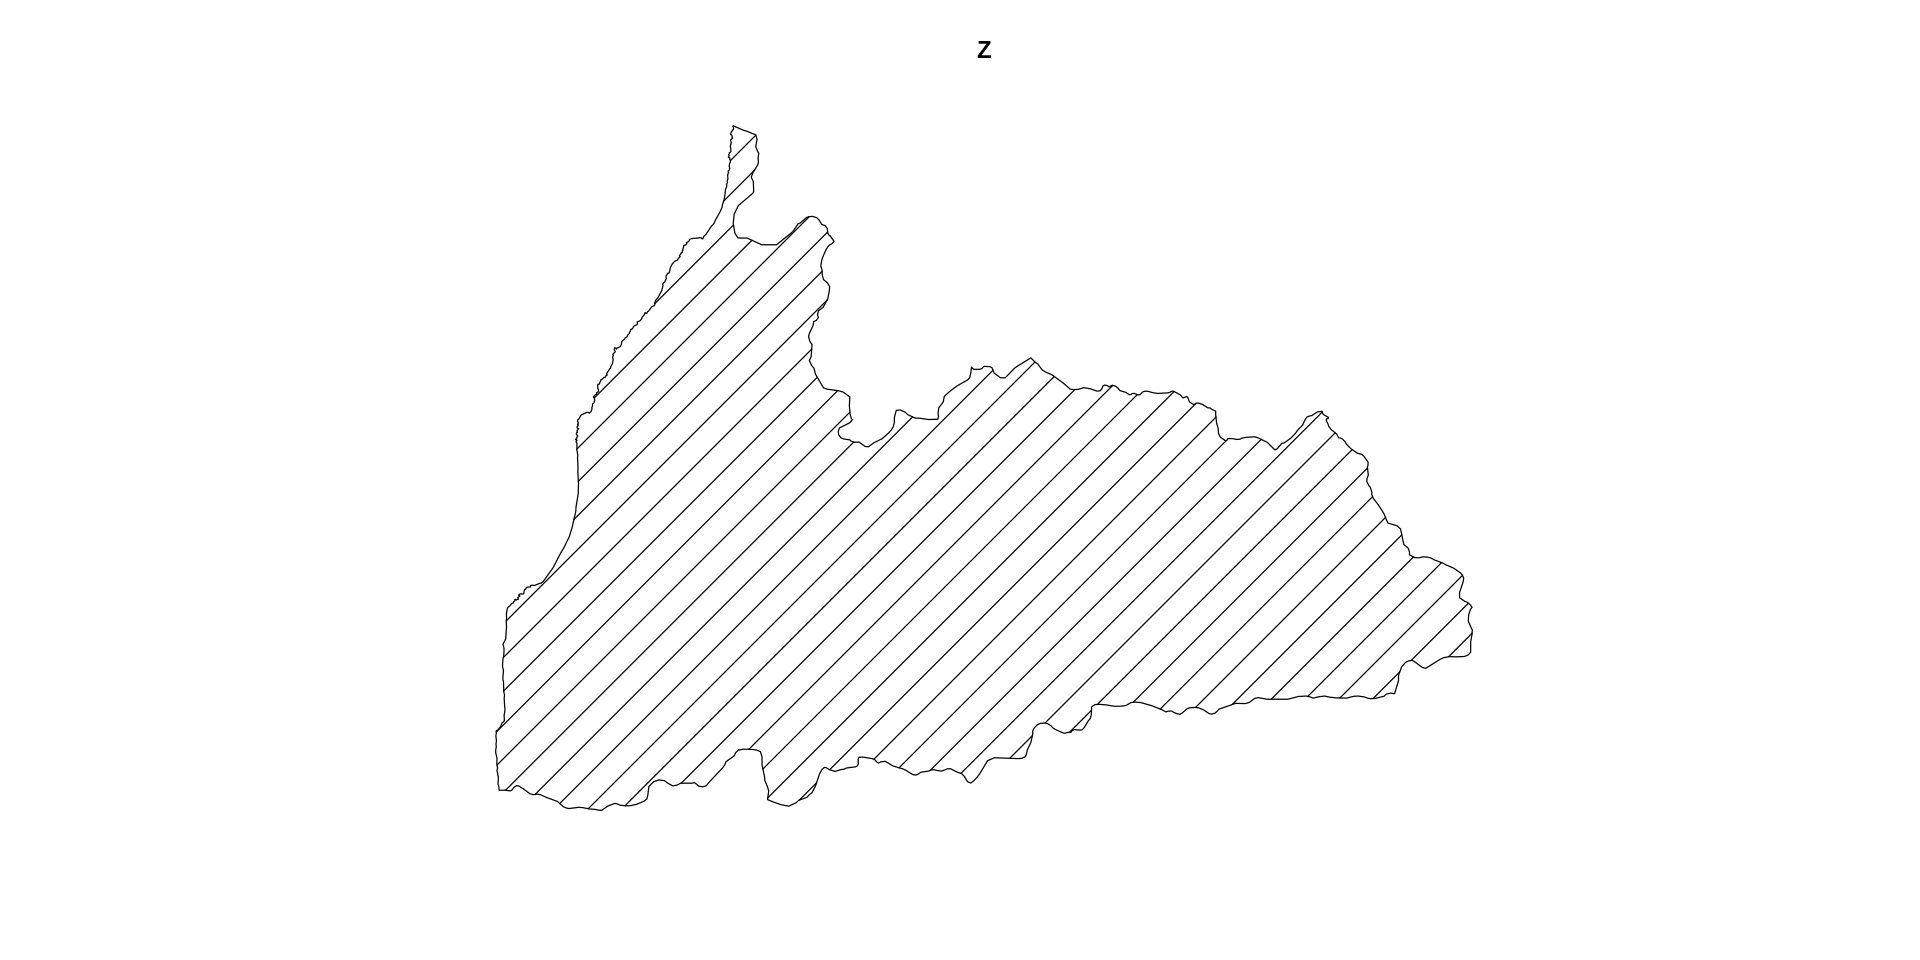

In [11]:
cuenca_cords <- st_coordinates(cuenca_s) |> as.data.frame()
Z <- owin(poly = list(x = rev(cuenca_cords$X), y=rev(cuenca_cords$Y))) # objeto almacenado en Z
plot(Z, hatch = T) # plotear la ventana Z

Warning message:
“1 point was rejected as lying outside the specified window”
Warning message in plot.ppp(xw, main = "Taller 2"):
“1 illegal points also plotted”


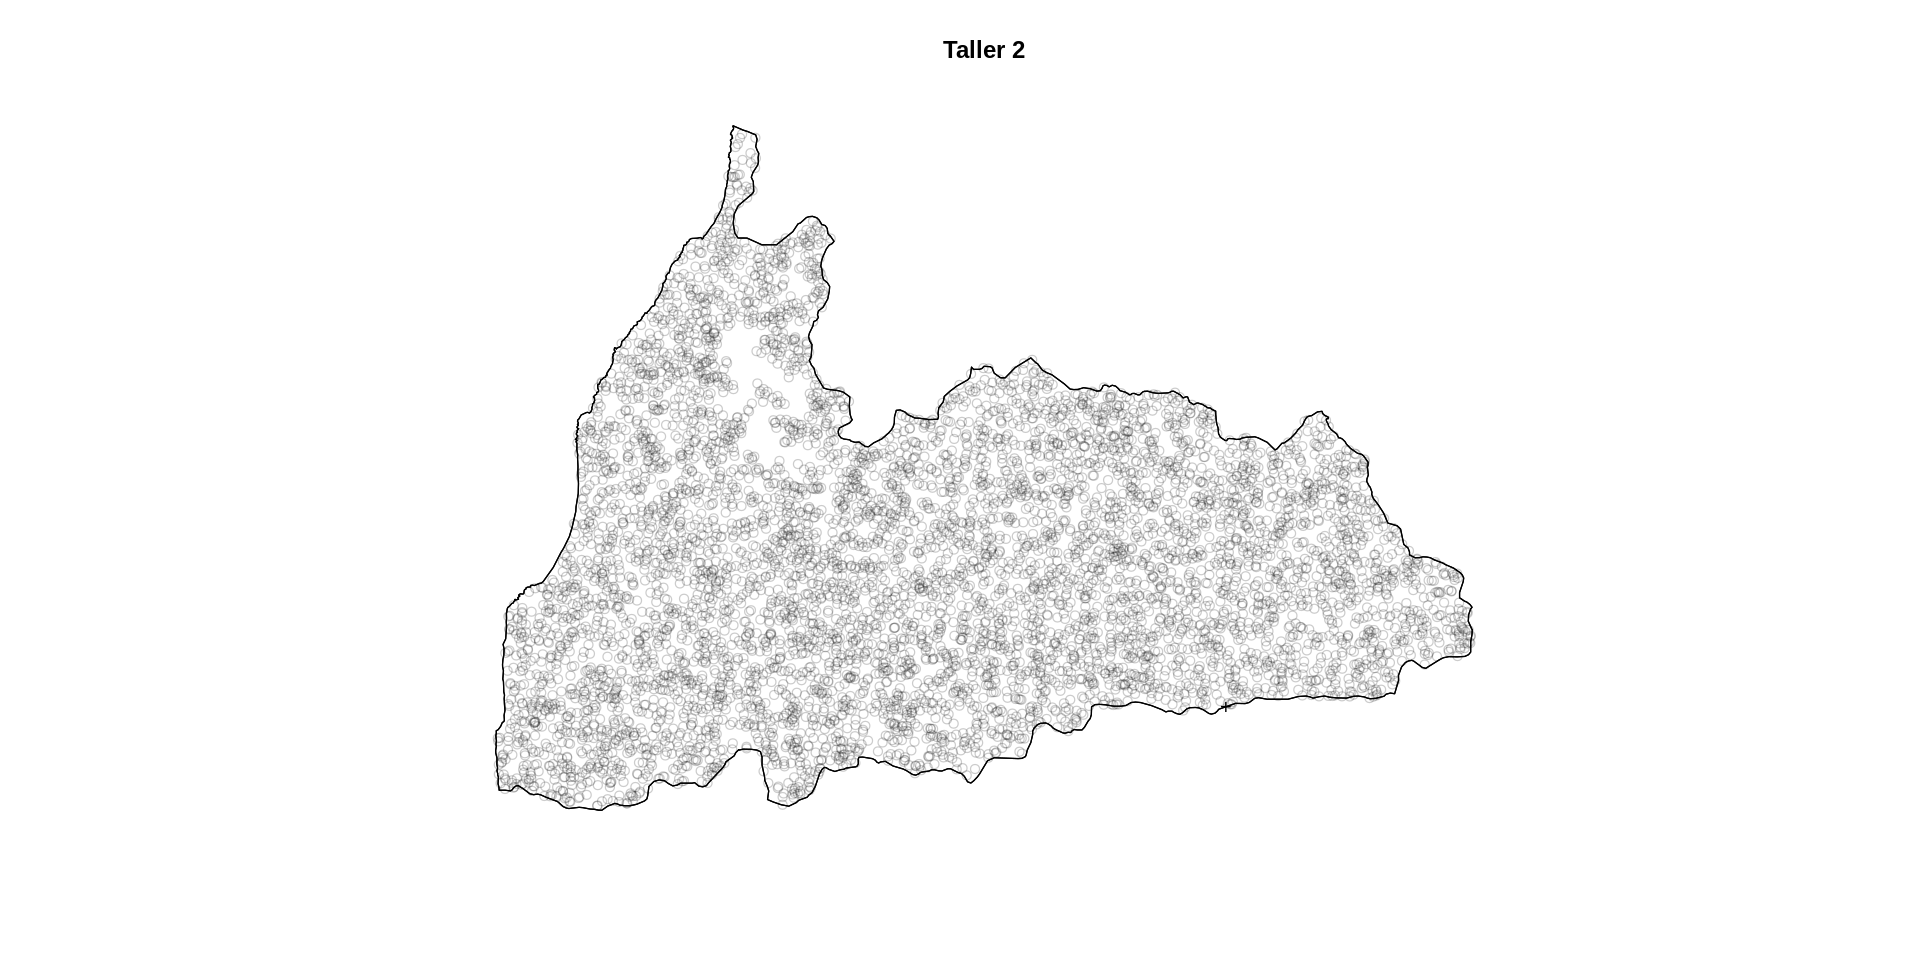

In [12]:
# Crear objeto ppp de patr?n de punto incluyendo ventana Z
xw <- ppp(cx,cy, window = Z) # Xw nombre del objeto creado
plot(xw, main = "Taller 2") # plotear objeto Xw

Warning message:
“1 point was rejected as lying outside the specified window”
Warning message in plot.ppp(xmw):
“1 illegal points also plotted”


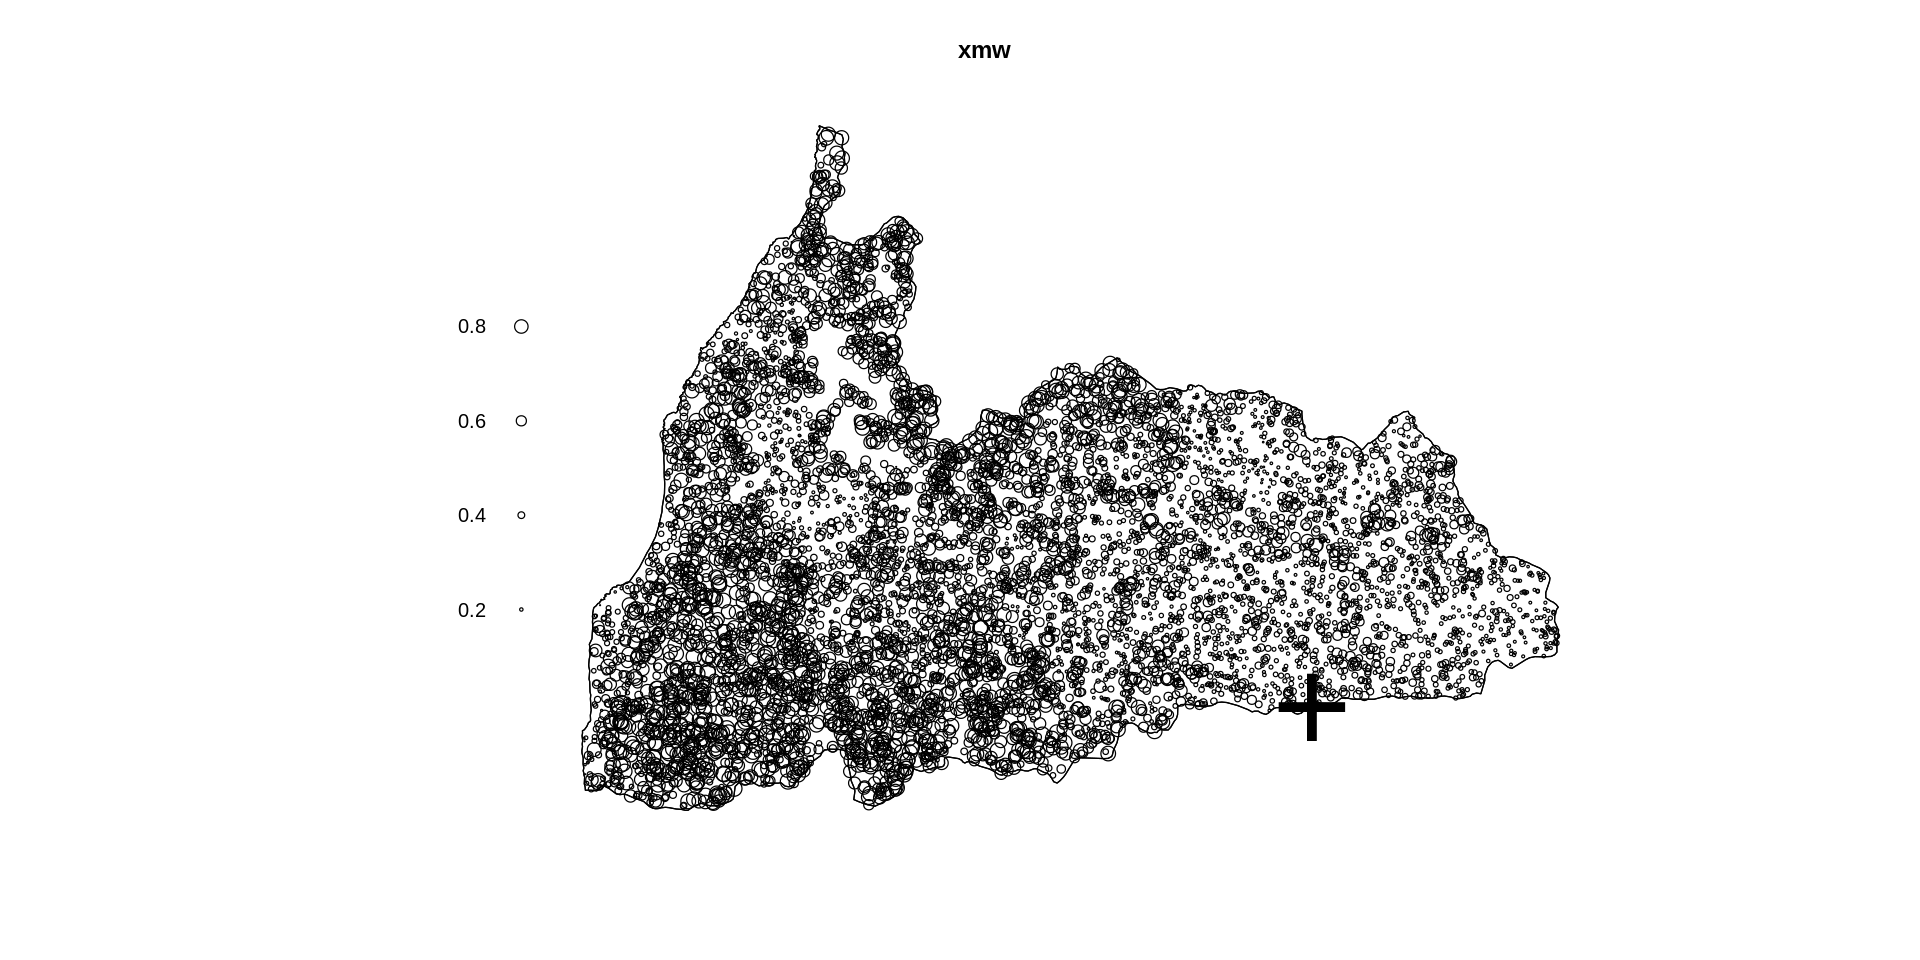

In [13]:
# Crear objeto ppp de patron de puntos con Marca y ventana Z
xmw <- ppp(cx,cy, window = Z, marks = s$ndvi)
plot(xmw)

1. `x` = sólo localización de puntos
1. `xm` = localización de puntos y NDVI como marca
1. `xw` = localizanción de puntos con ventana
1. `xmw` = Localización+marca+ventana polígono

# Patrones

In [14]:
Q <- quadratcount(xw, nx=5, ny=5) # nx y ny número de cuadrados

Warning message in plot.ppp(xw):
“1 illegal points also plotted”


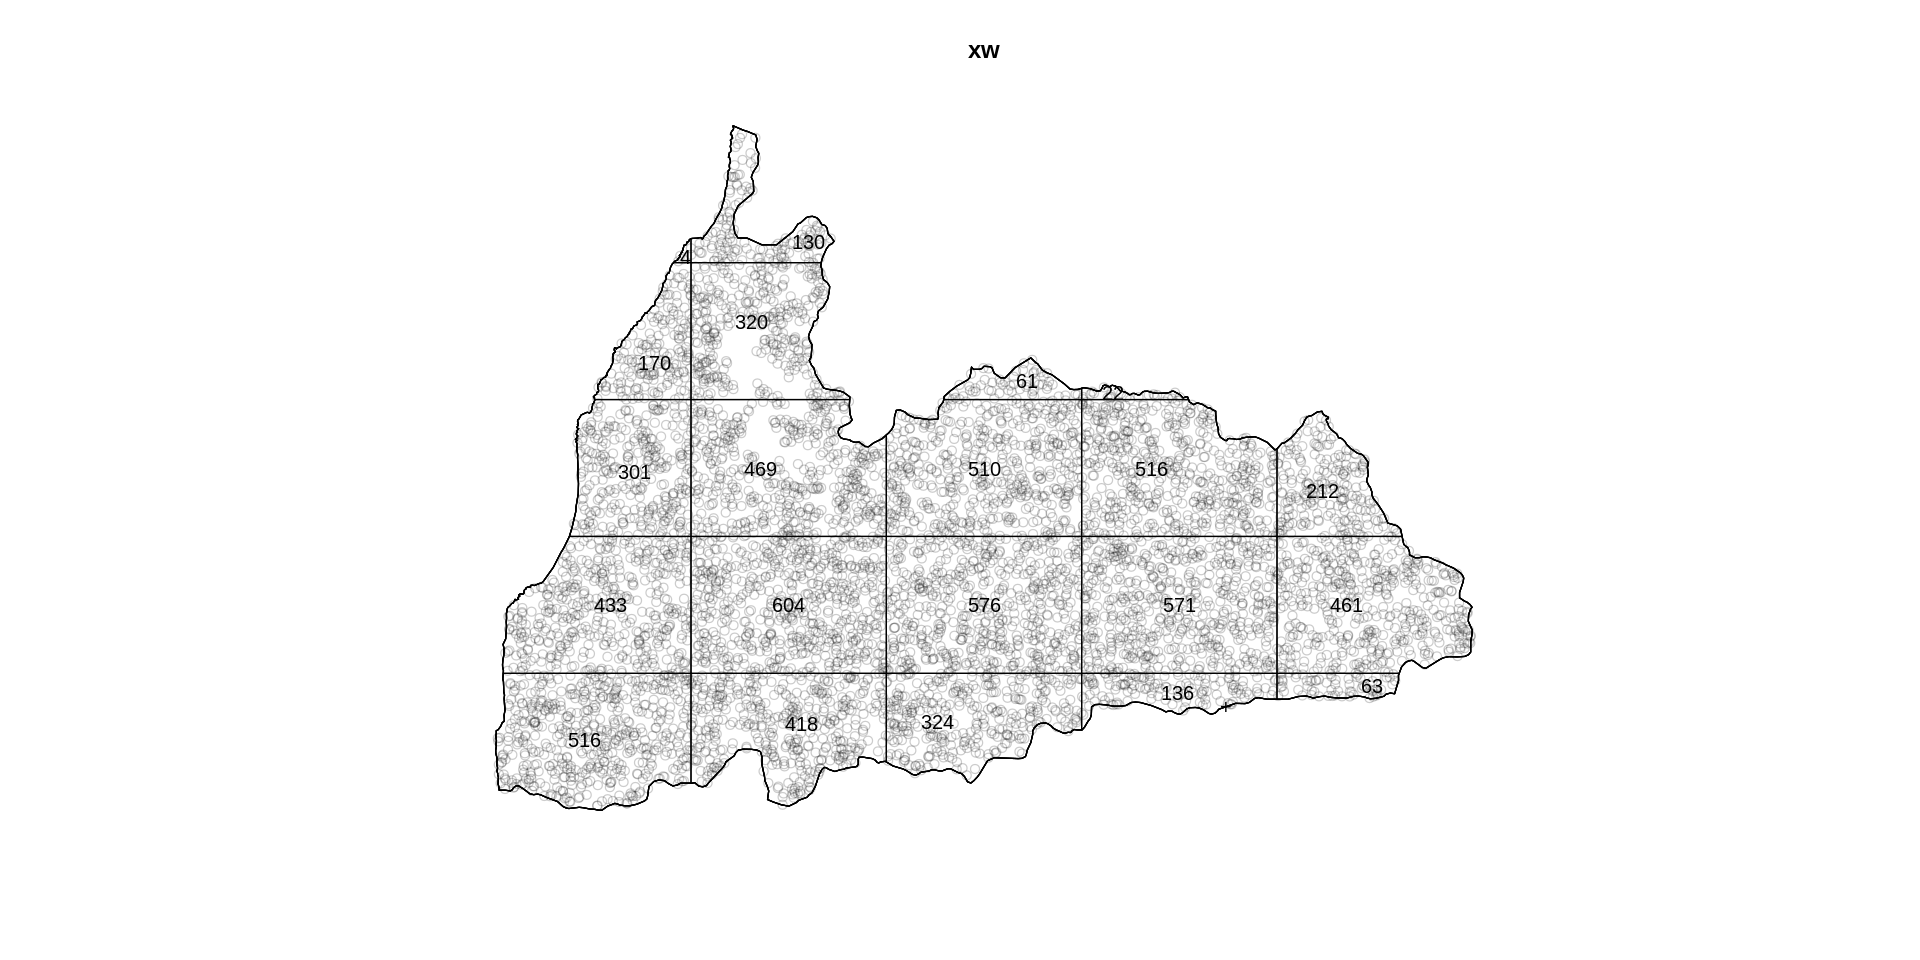

In [15]:
plot(xw) # se puede plotear
plot(Q, add = TRUE, cex=1)

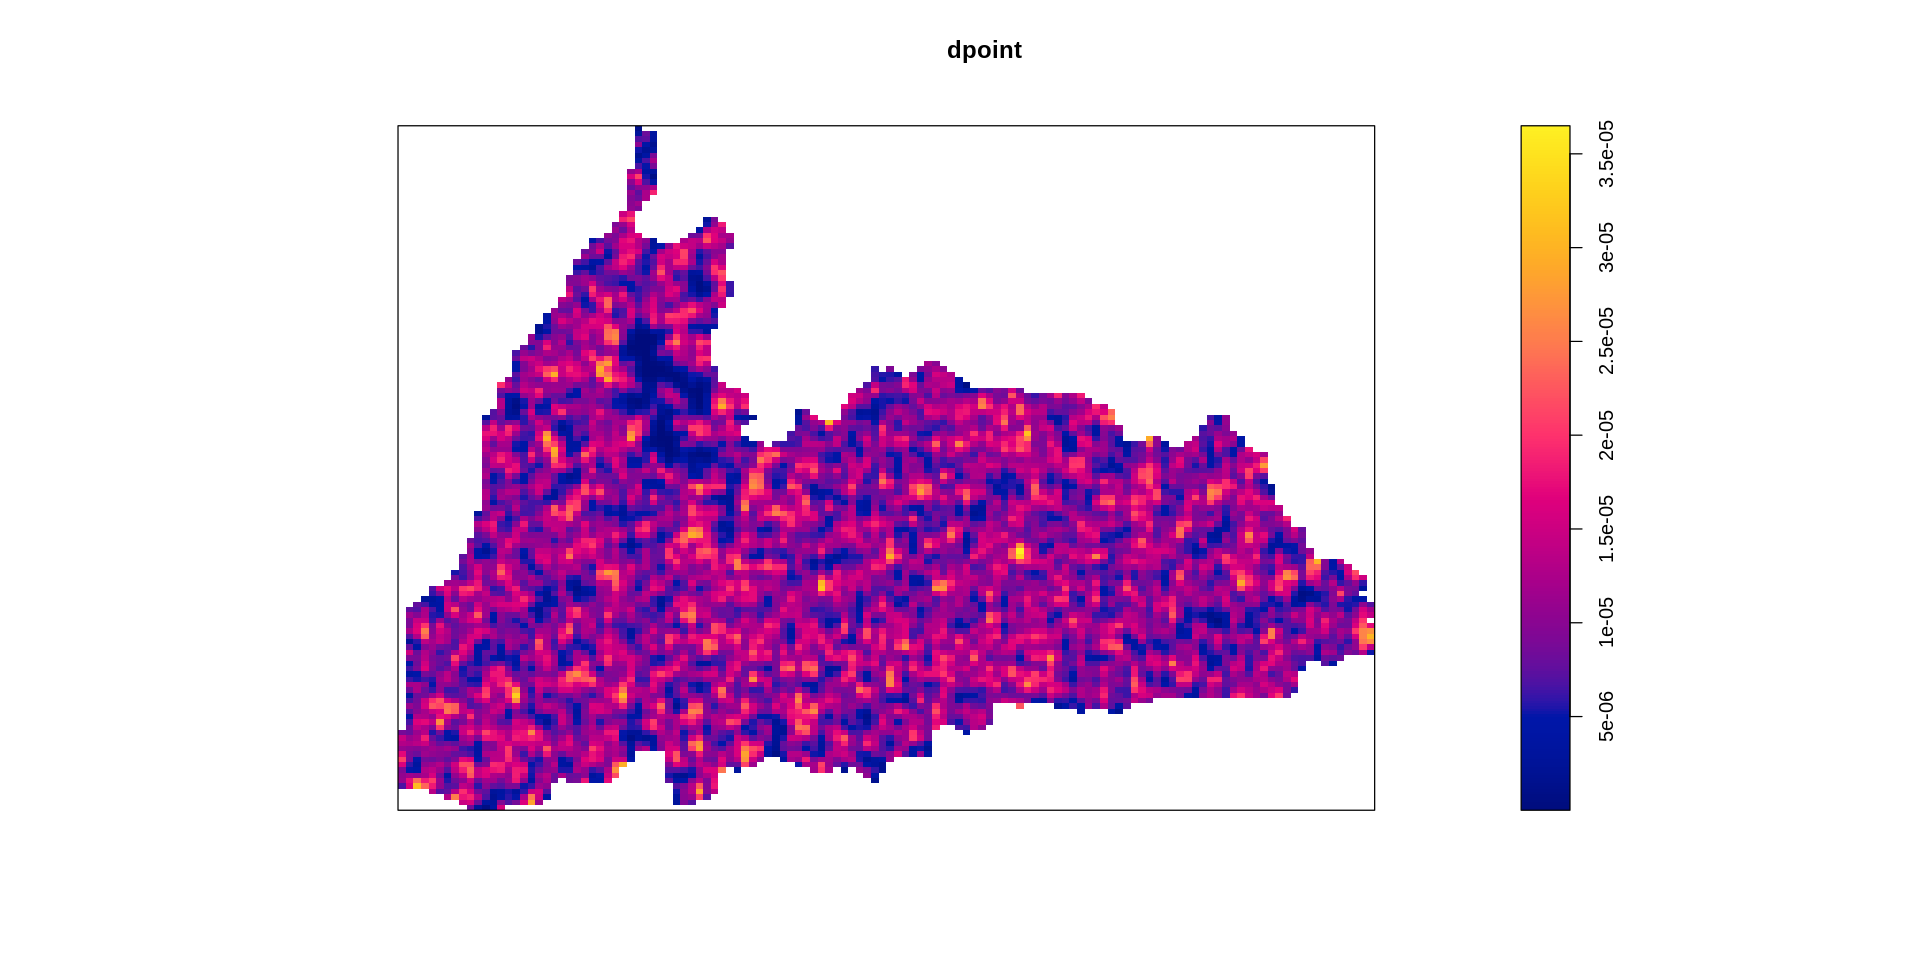

In [16]:
dpoint <- density(xw, 200) # densidad de puntos de acuerdo a ventana kernel
plot(dpoint) #impresion of local spatial variatio

In [17]:
summary(dpoint)

real-valued pixel image
128 x 128 pixel array (ny, nx)
enclosing rectangle: [208863.8, 250822.1] x [6125493, 6154898] units
dimensions of each pixel: 328 x 229.7266 units
Image is defined on a subset of the rectangular grid
Subset area = 613728224.028946 square units
Subset area fraction = 0.497
Pixel values (inside window):
	range = [5.644569e-09, 3.64952e-05]
	integral = 6794.058
	mean = 1.107014e-05

Warning message:
“1 point was rejected as lying outside the specified window”
Warning message in plot.ppp(xw, main = "Taller 2", add = T):
“1 illegal points also plotted”


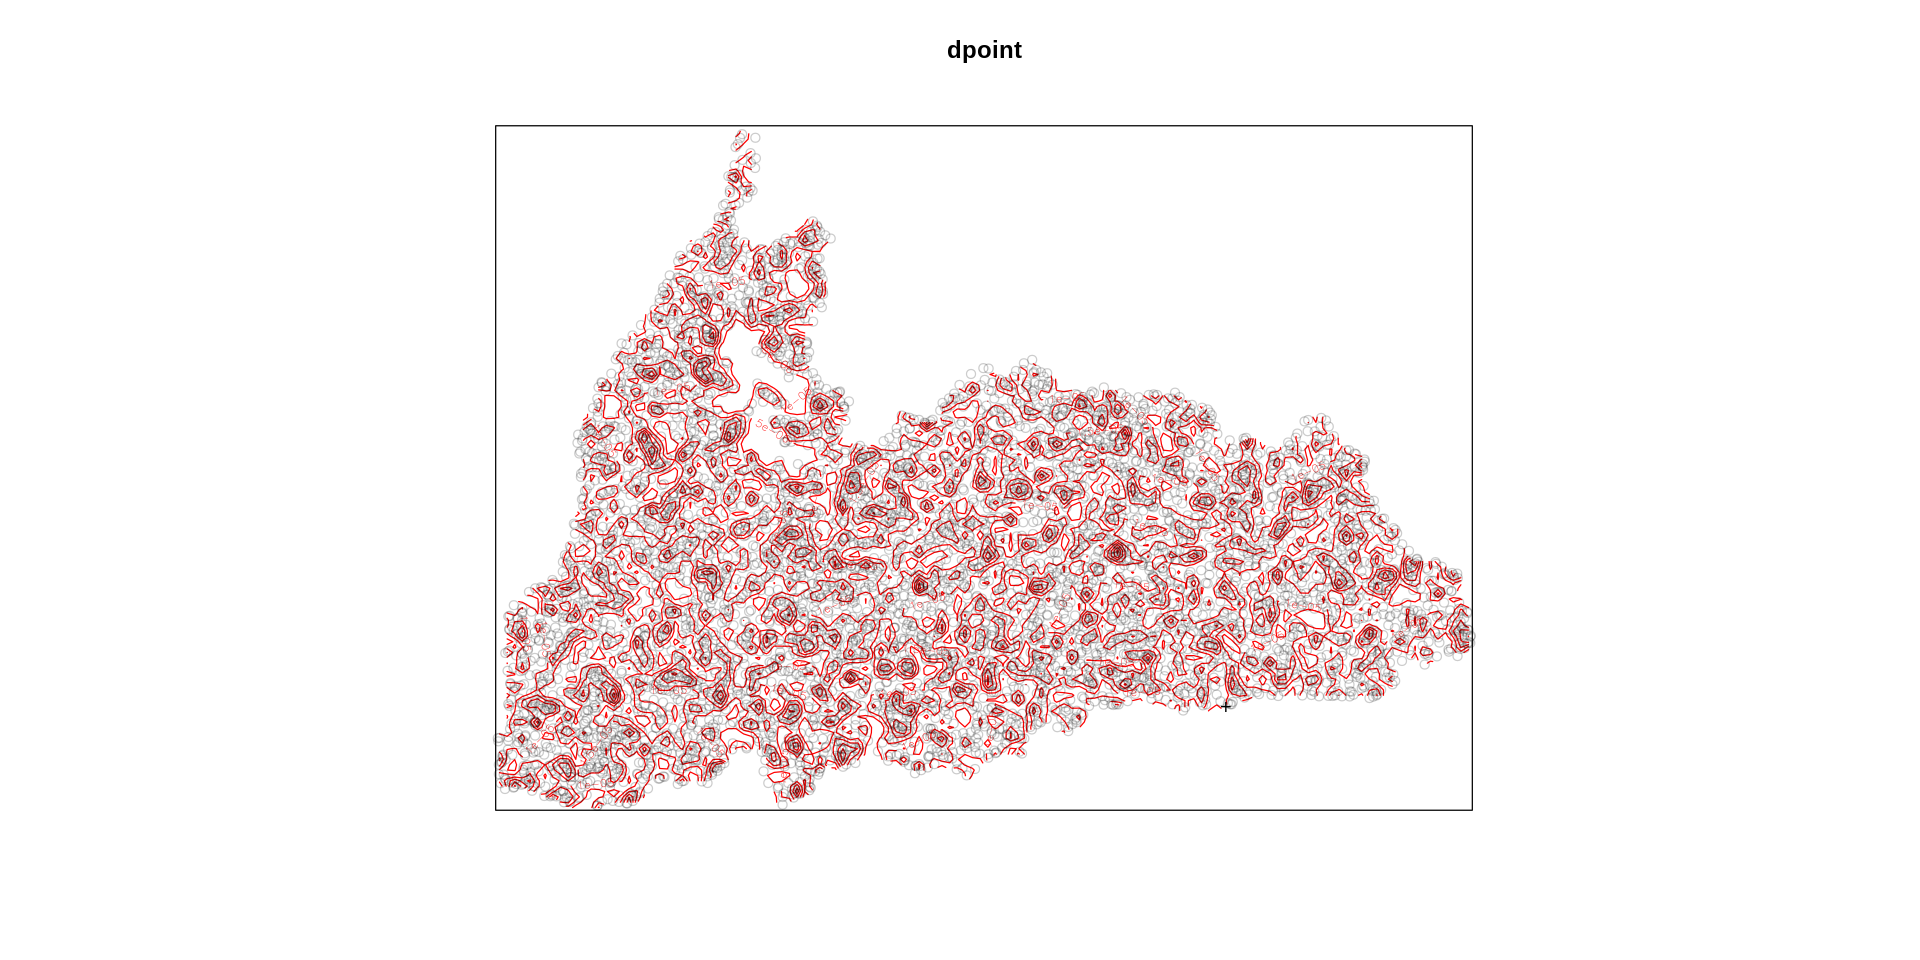

In [18]:
contour(dpoint, col="red") # densidad con lineas de contorno
xw <- ppp(cx,cy, window = Z) # Xw nombre del objeto creado
plot(xw, main = "Taller 2", add=T) # plotear objeto Xw

Warning message in plot.ppp(xw, add = TRUE):
“1 illegal points also plotted”


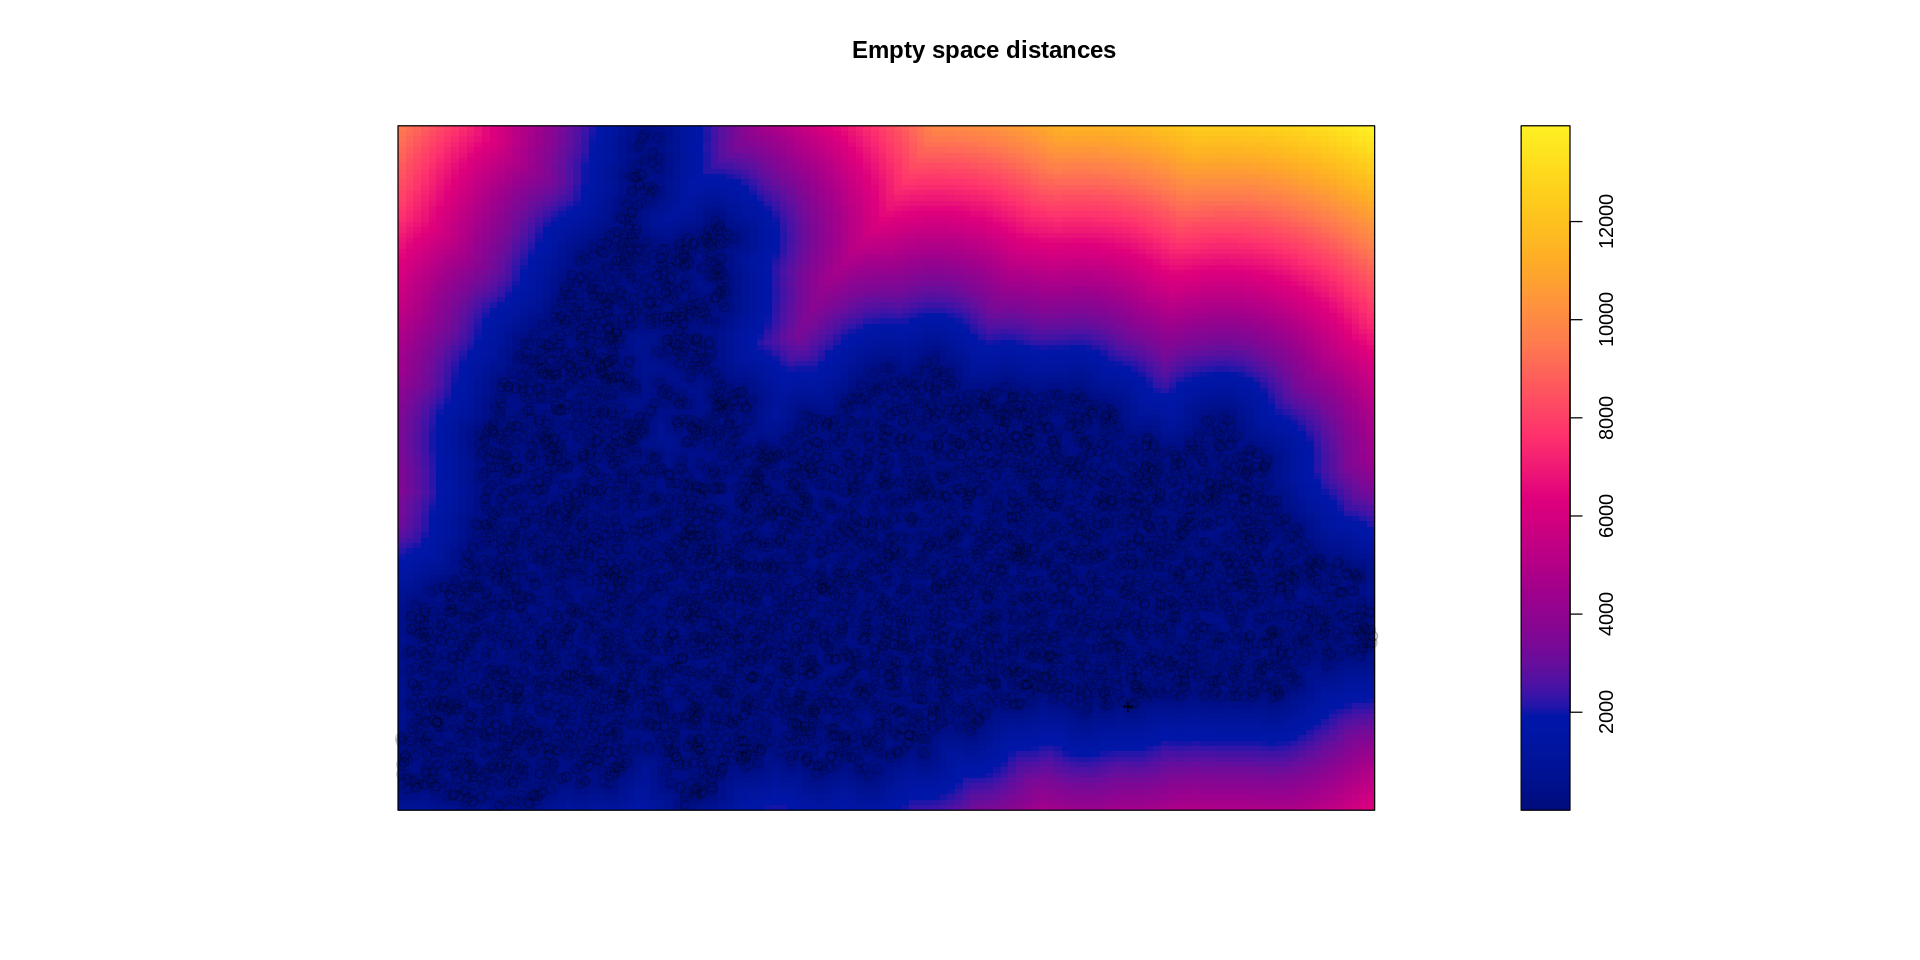

In [19]:
emp <- distmap(xw)
plot(emp, main = "Empty space distances")
plot(xw, add = TRUE)

## Test aleatoriedad espacial (Poisson process)

Revisemos si es completamente aleatorio (CRS)

* $H_0$: CSR con Poisson (proceso homogéneo Poisson)
* $H_1$: No CSR

In [20]:
nx <- 4
ny <- 4

In [21]:
M <- quadrat.test(xw, nx = nx, ny = nx)
M


	Chi-squared test of CSR using quadrat counts

data:  xw
X2 = 26.149, df = 13, p-value = 0.03247
alternative hypothesis: two.sided

Quadrats: 14 tiles (irregular windows)

Warning message in plot.ppp(xw):
“1 illegal points also plotted”


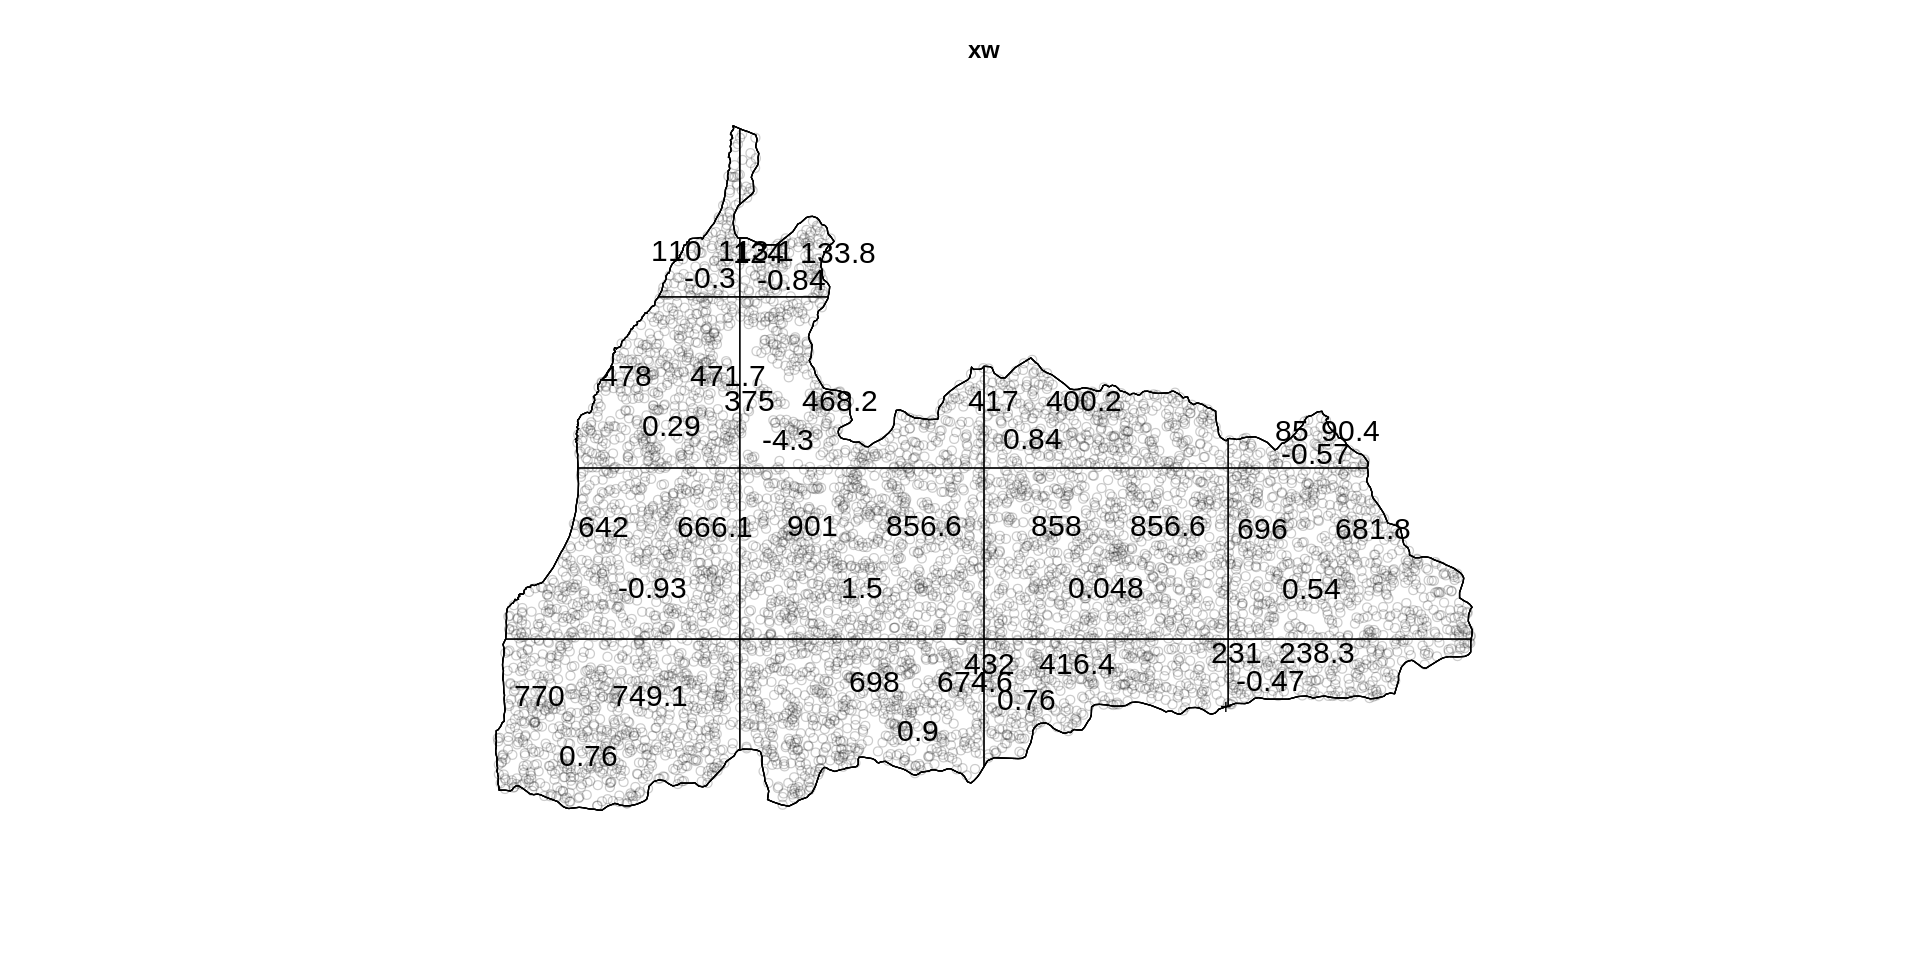

In [22]:
plot(xw)
plot(M, add = TRUE, cex = 1.5)

Pearson residuals: $\frac{obs - esp}{\sqrt{esp}}$

## Morisita Index

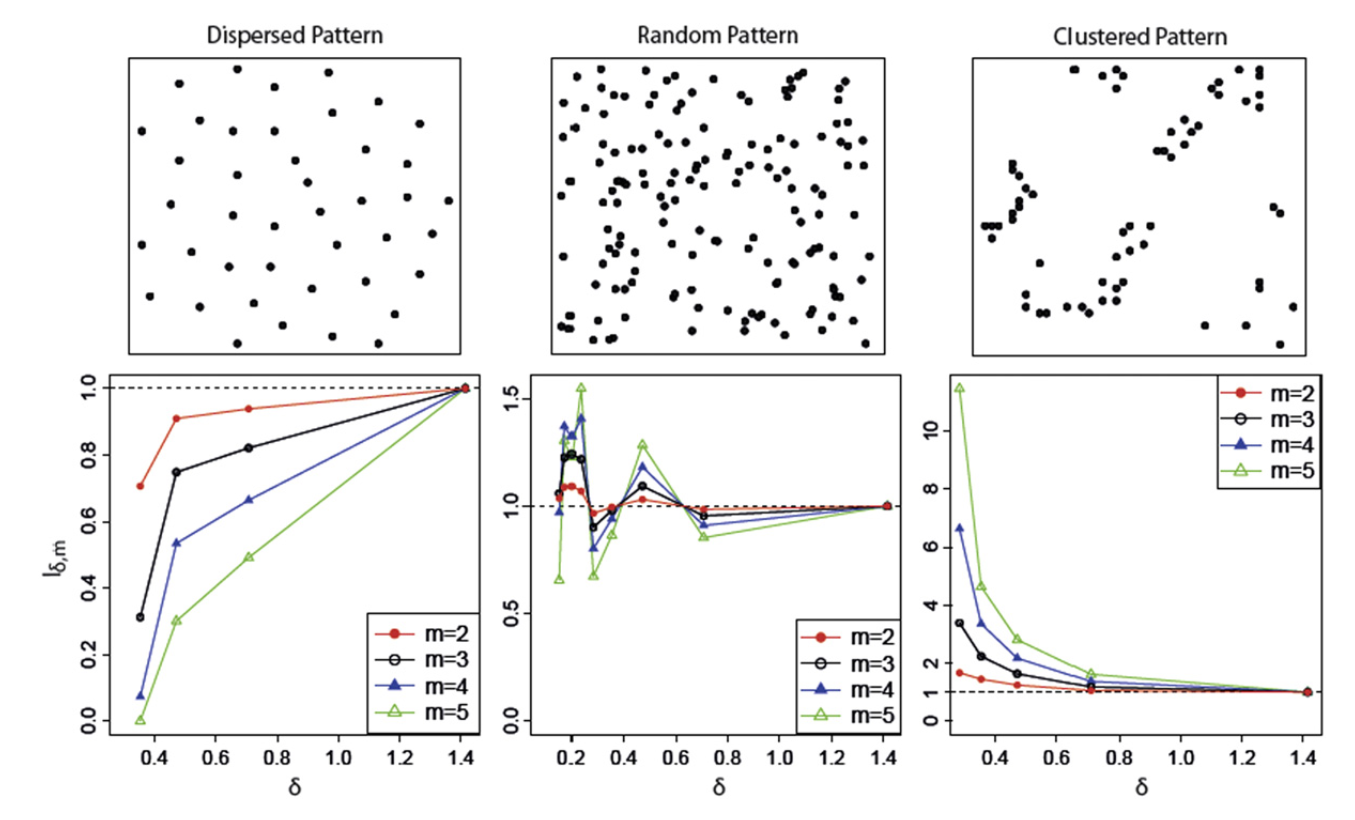
> *Fuente: Golay J, Kanevski M, Vega Orozco CD, Leuenberger M. The multipoint Morisita index for the analysis of spatial patterns. Physica A: Statistical Mechanics and its Applications. julio de 2014;406:191–202.*

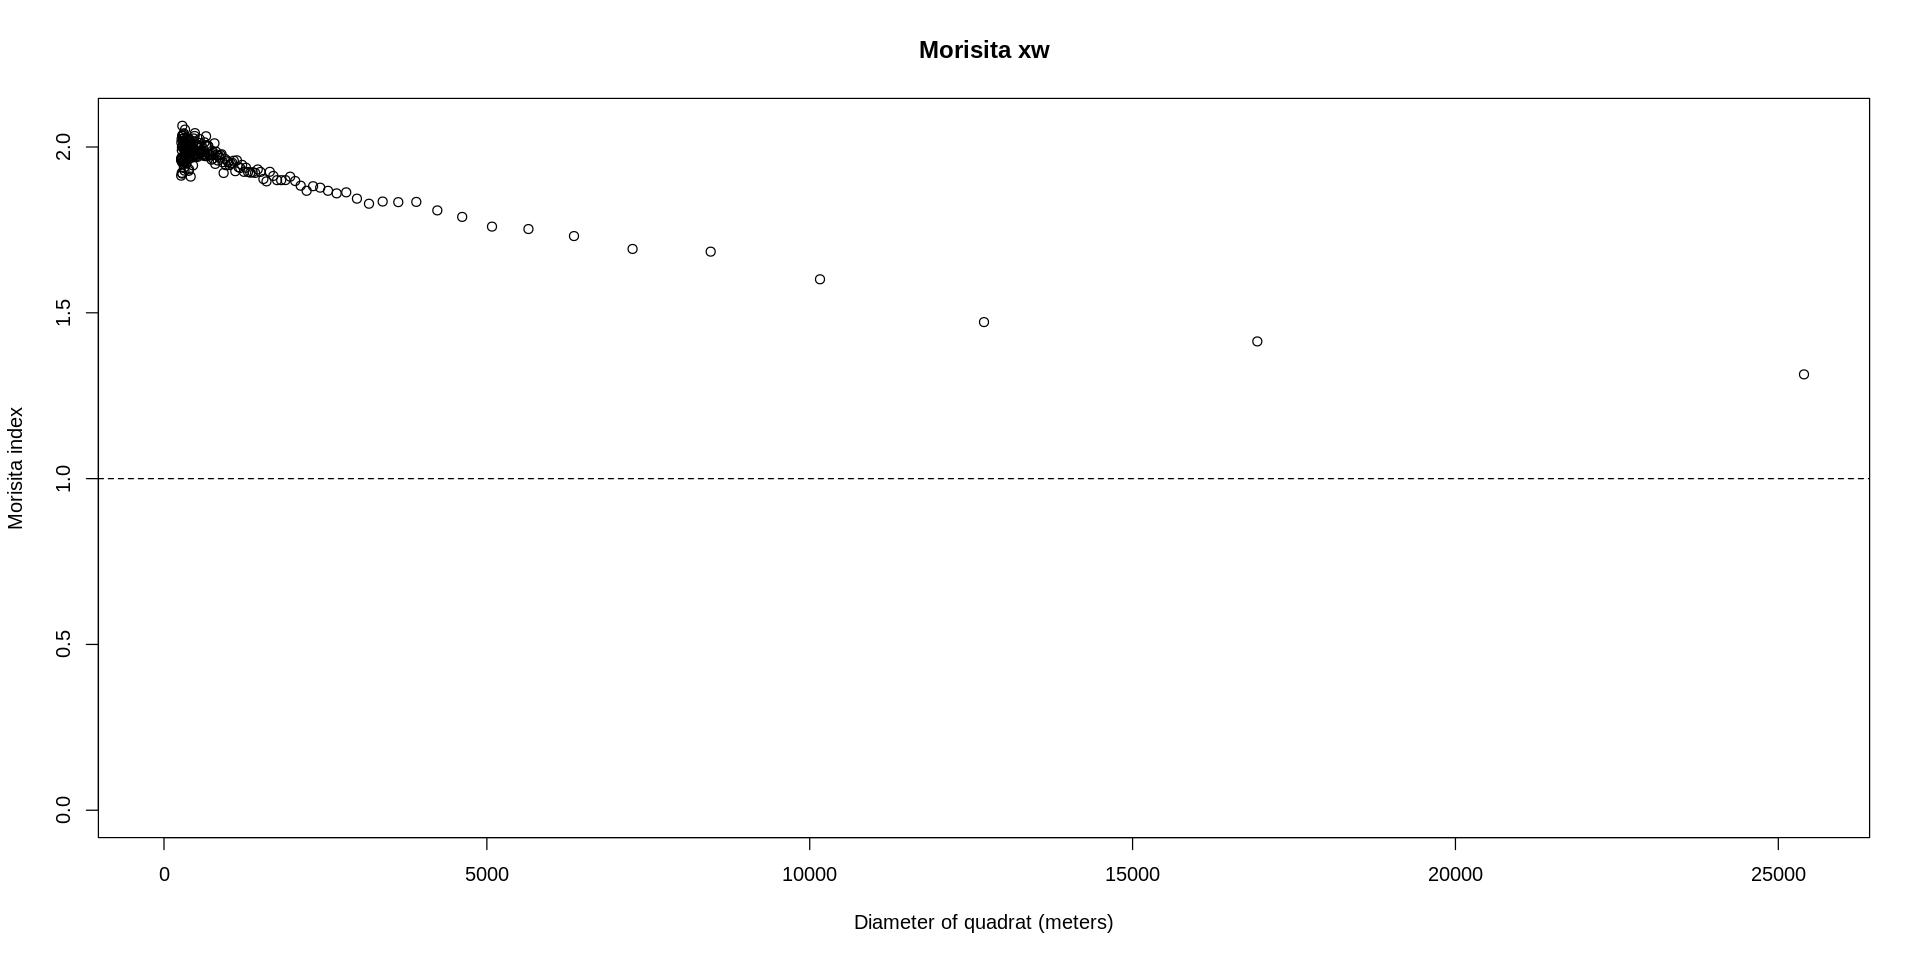

In [23]:
miplot(x, main="Morisita xw") # Morisita’s index of dispersion

## K y L de Ripley

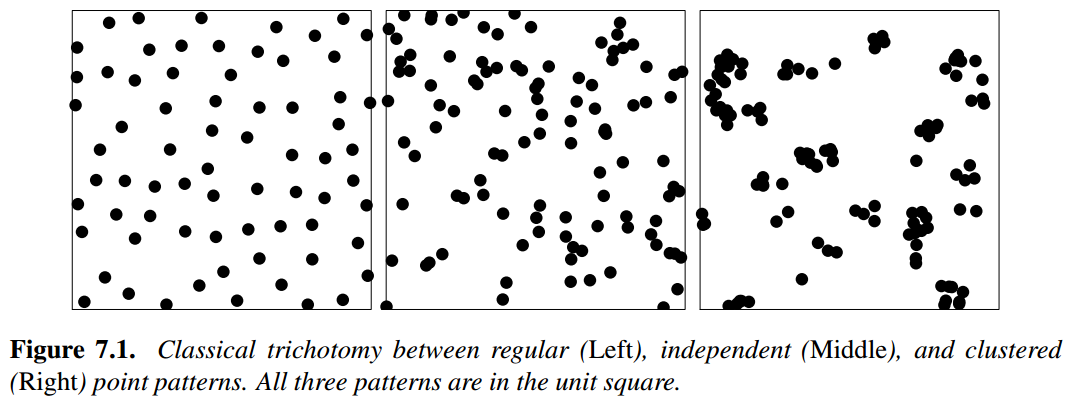
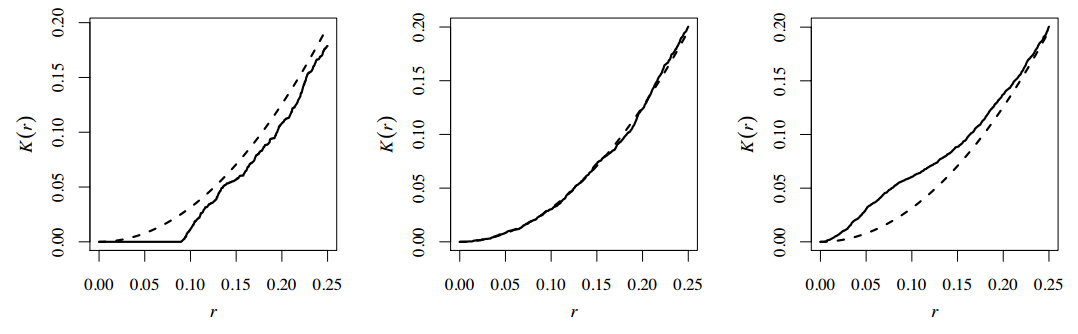
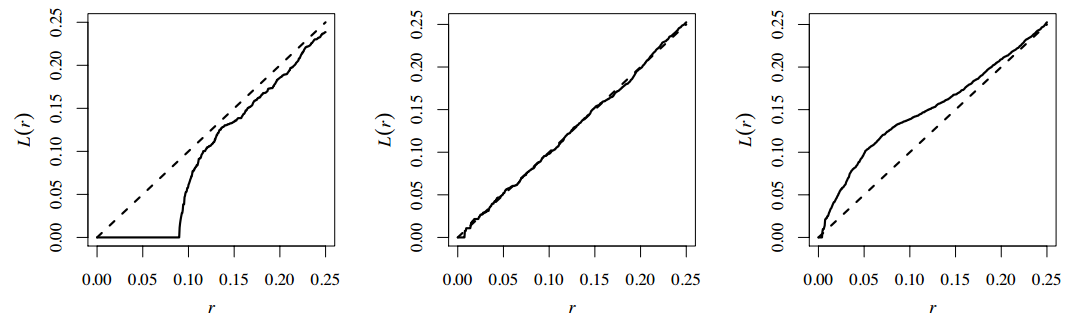
>*Fuente: Baddeley A, Rubak E, Turner R. Spatial point patterns: methodology and applications with R [Internet]. Boca Raton London New York: CRC Press; 2016. 810 p. (Chapman & Hall/CRC interdisciplinary statistics series). Disponible en: https://book.spatstat.org/chapter-code/instructions.html*

### Todos los puntos

number of data points exceeds 3000 - computing border correction estimate only



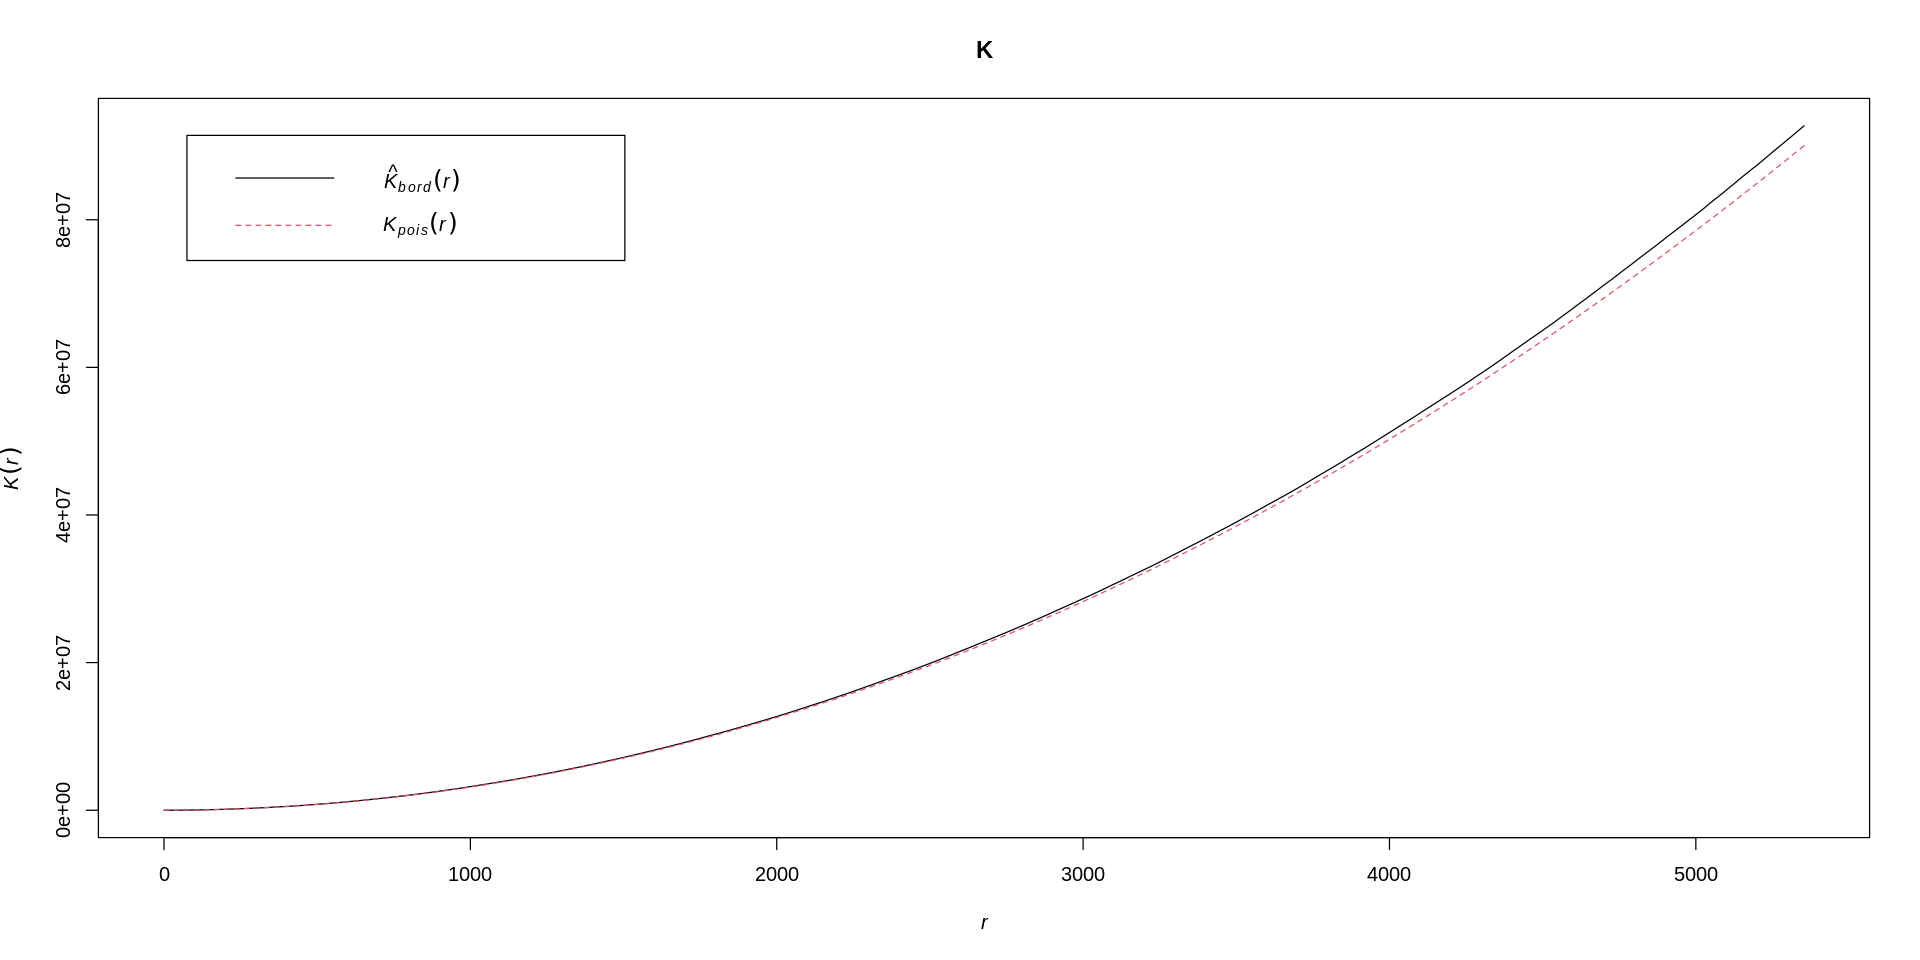

In [24]:
K <- Kest(xw) # K Ripley's function
plot(K)

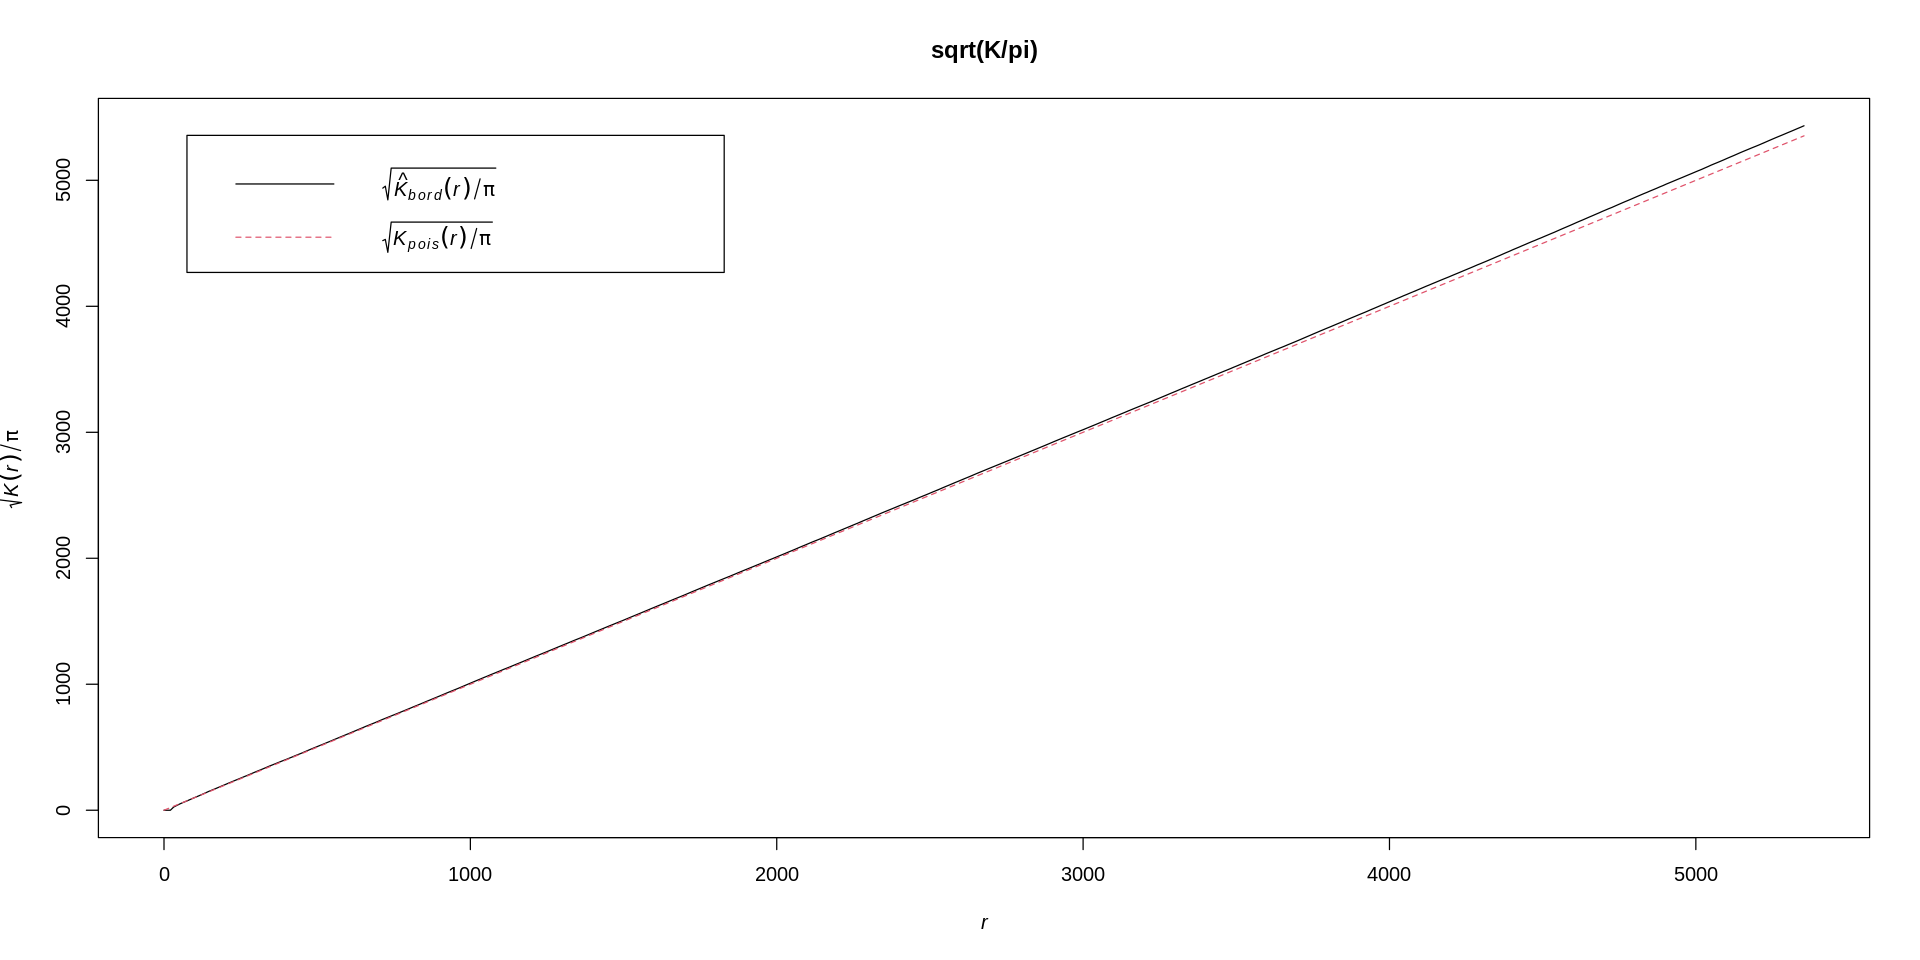

In [25]:
plot(sqrt(K/pi))

number of data points exceeds 3000 - computing border correction estimate only



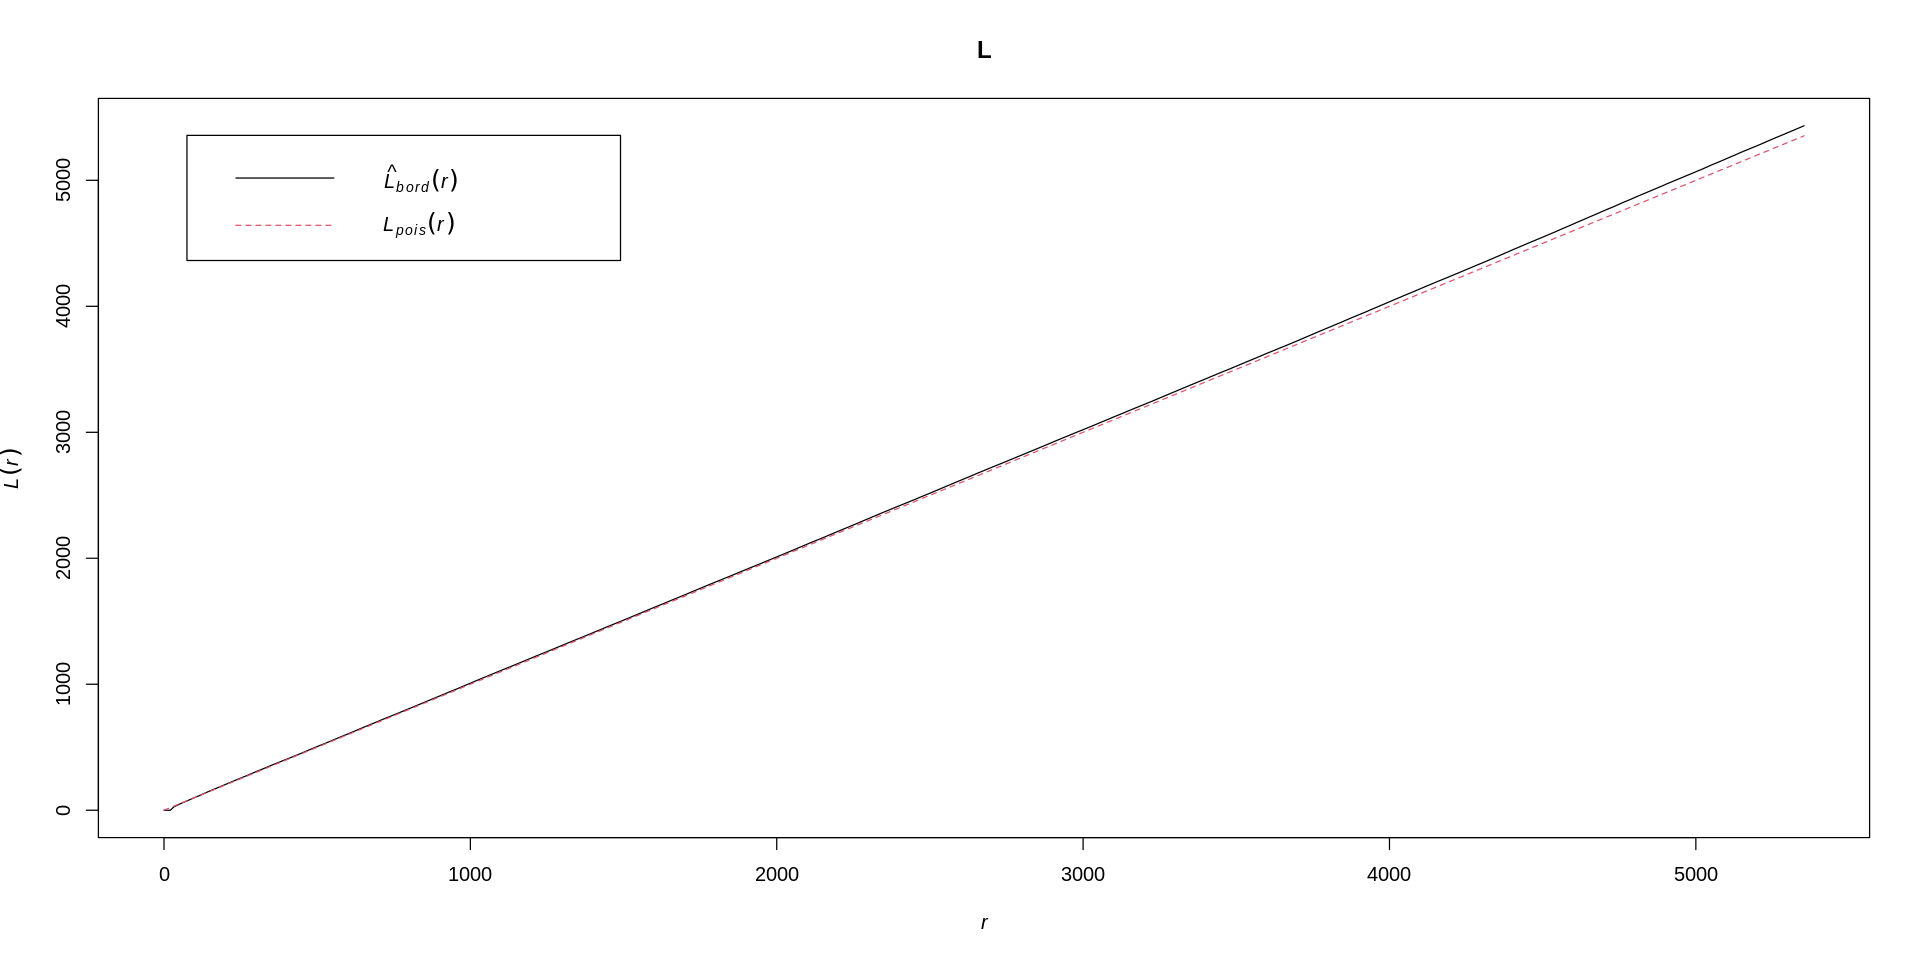

In [26]:
L <- Lest(xw)
plot(L)

### Un cuadrante

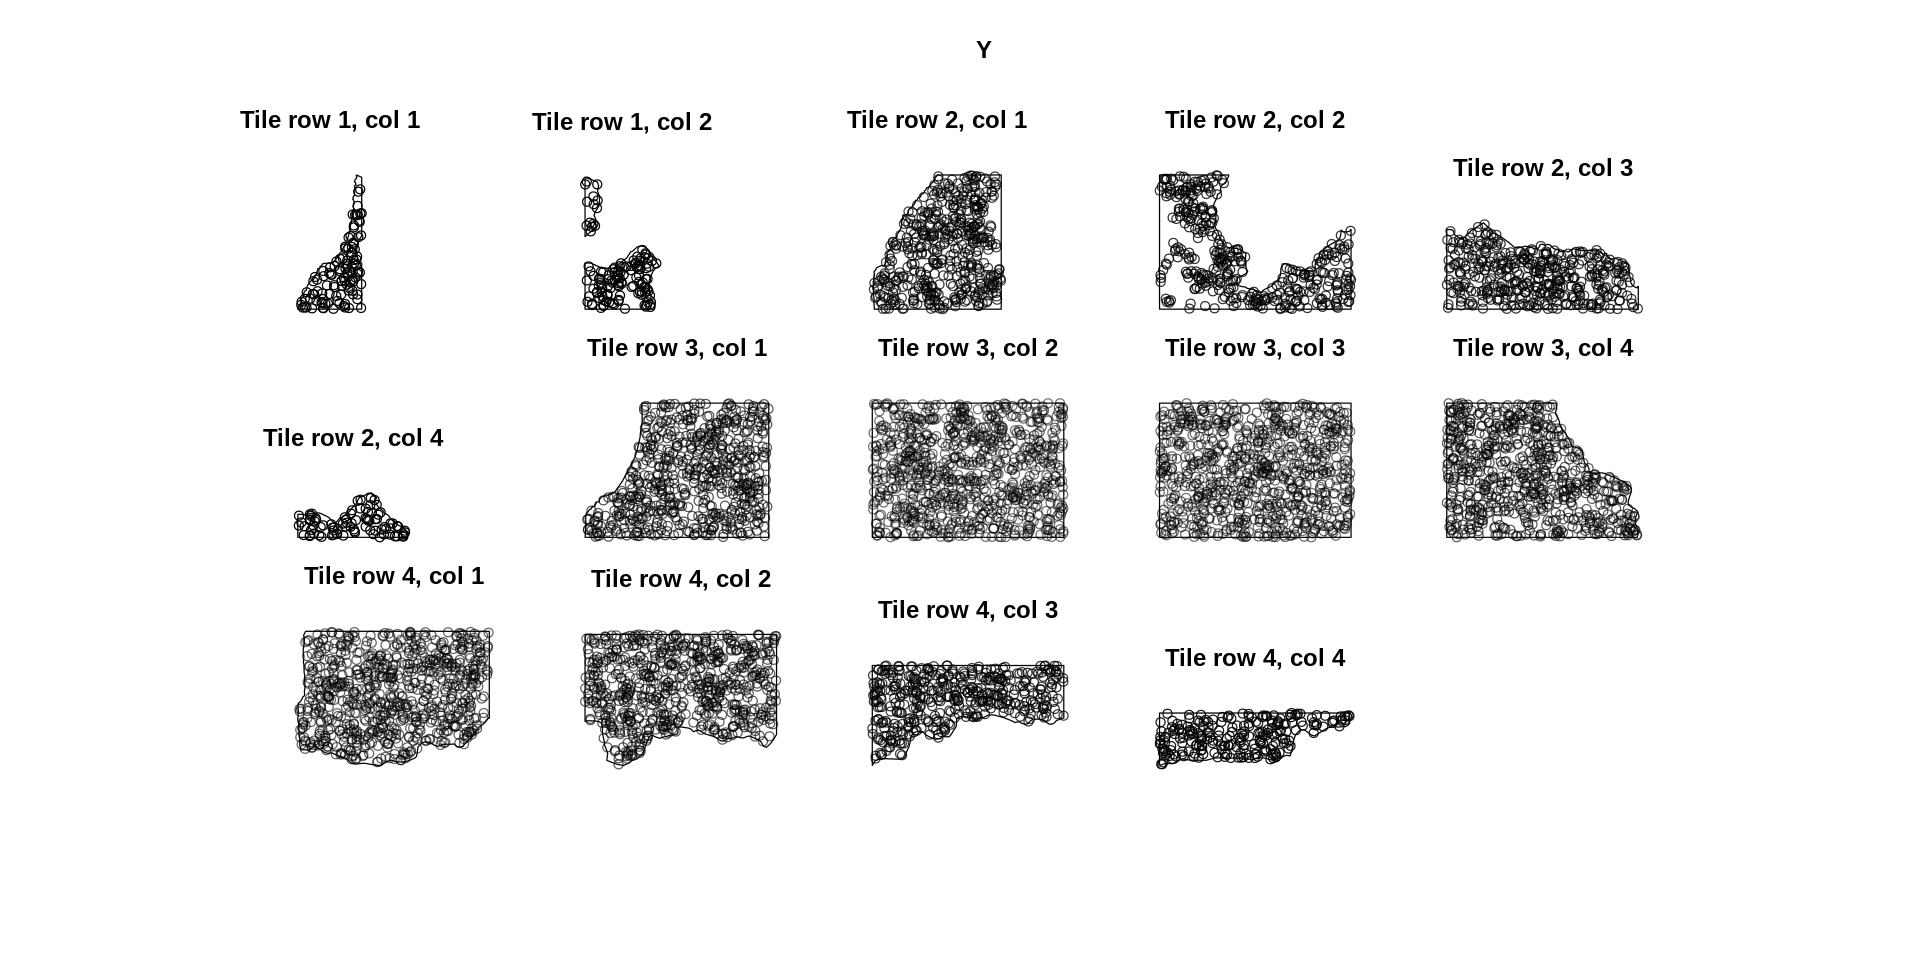

In [27]:
Y <- split(xw, quadrats(xw, nx, ny))
plot(Y)

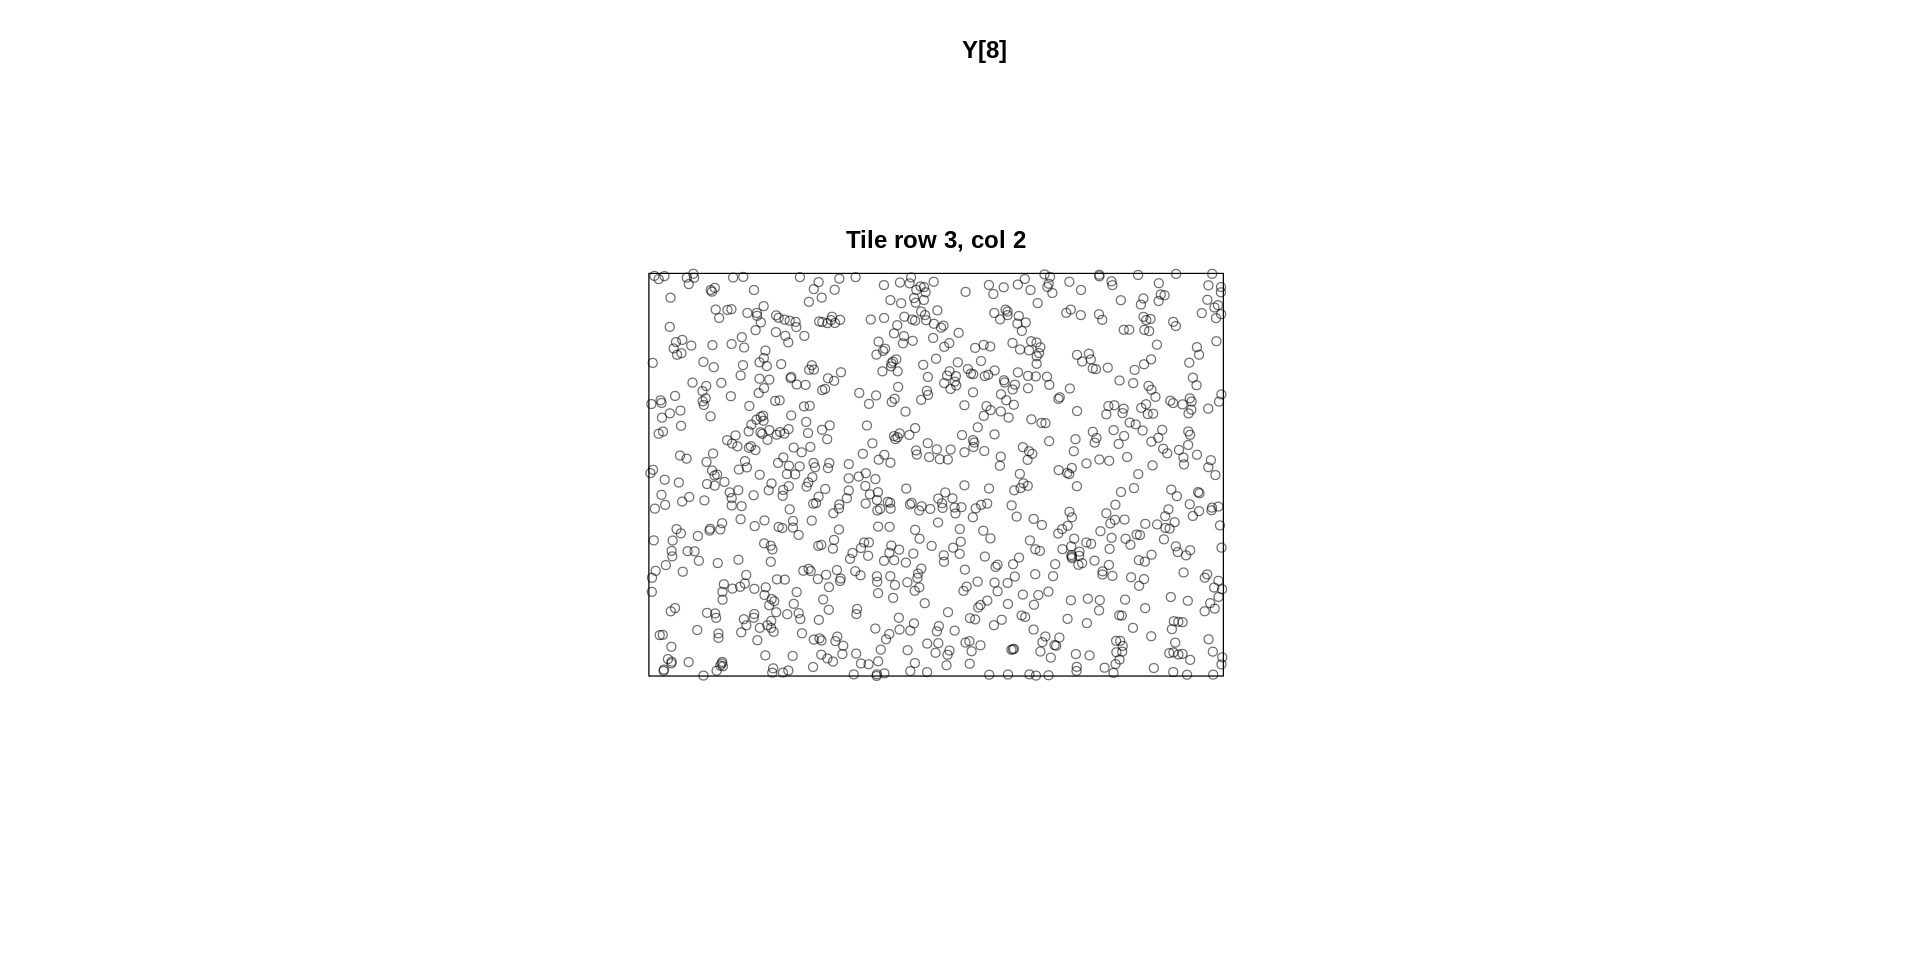

In [28]:
plot(Y[8])

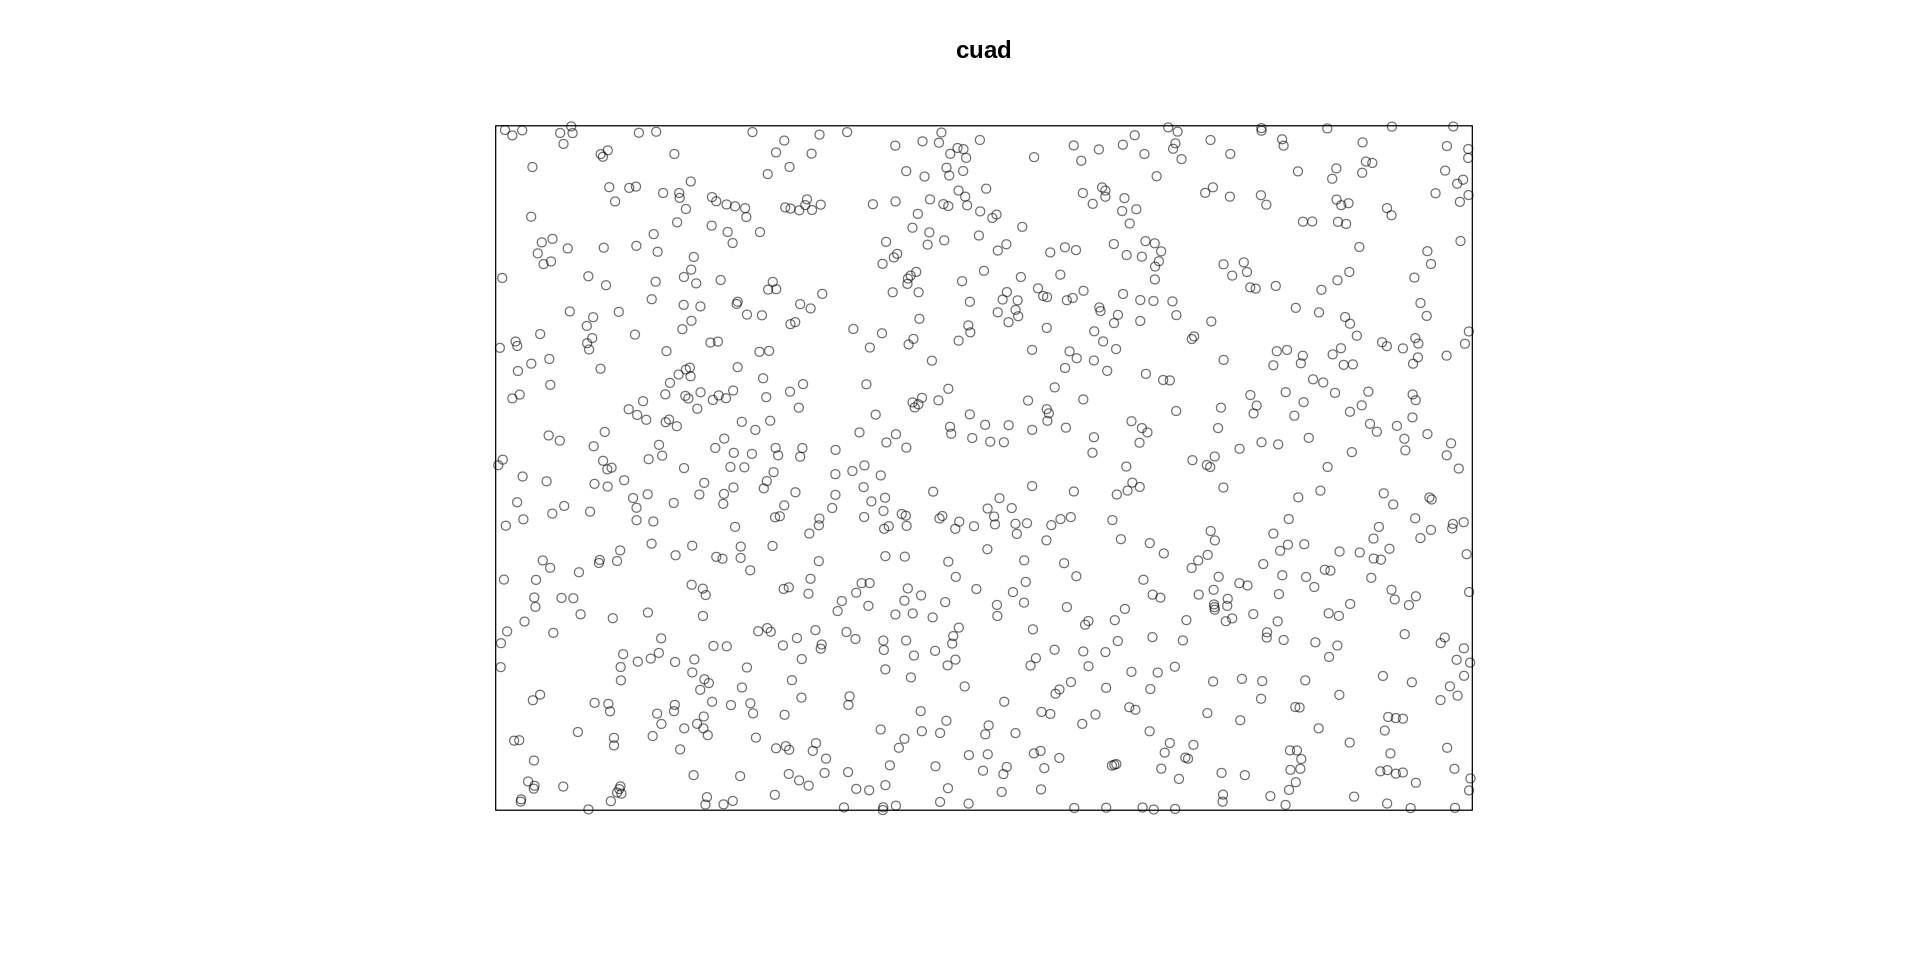

In [29]:
cuad <- Y[8][[1]]
plot(cuad)

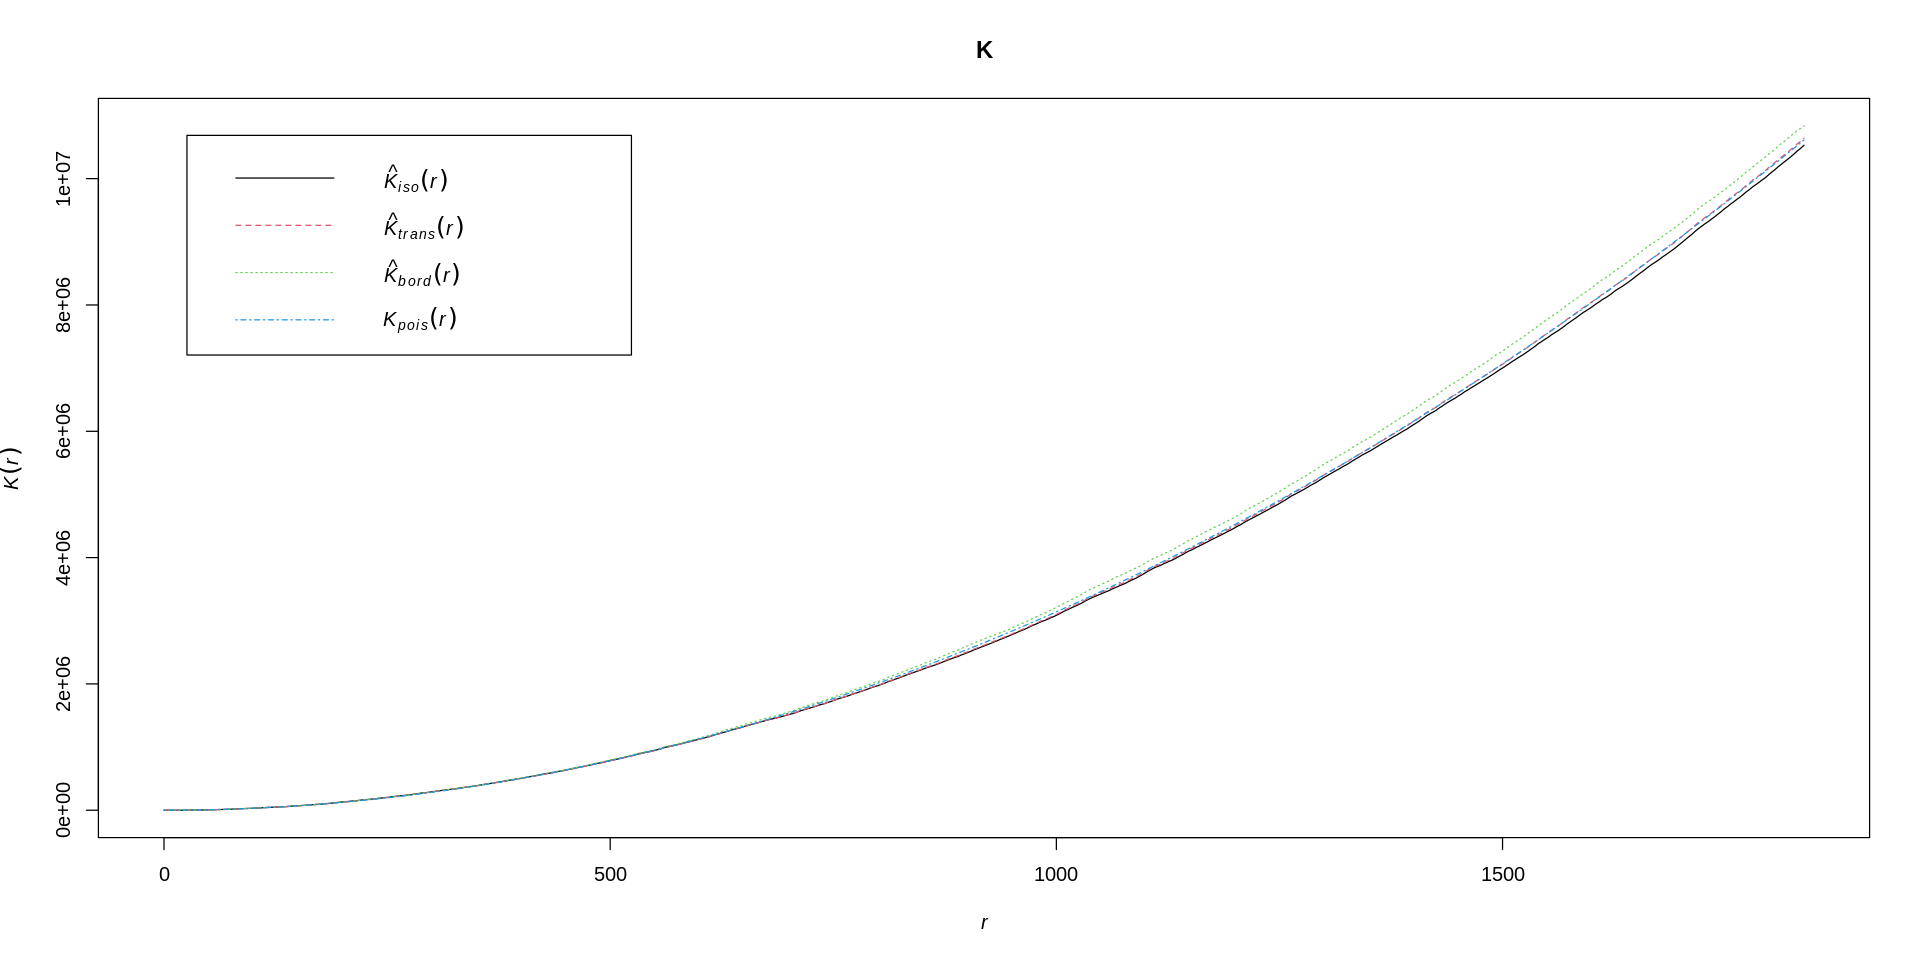

In [30]:
K <- Kest(cuad) # K Ripley's function
plot(K)

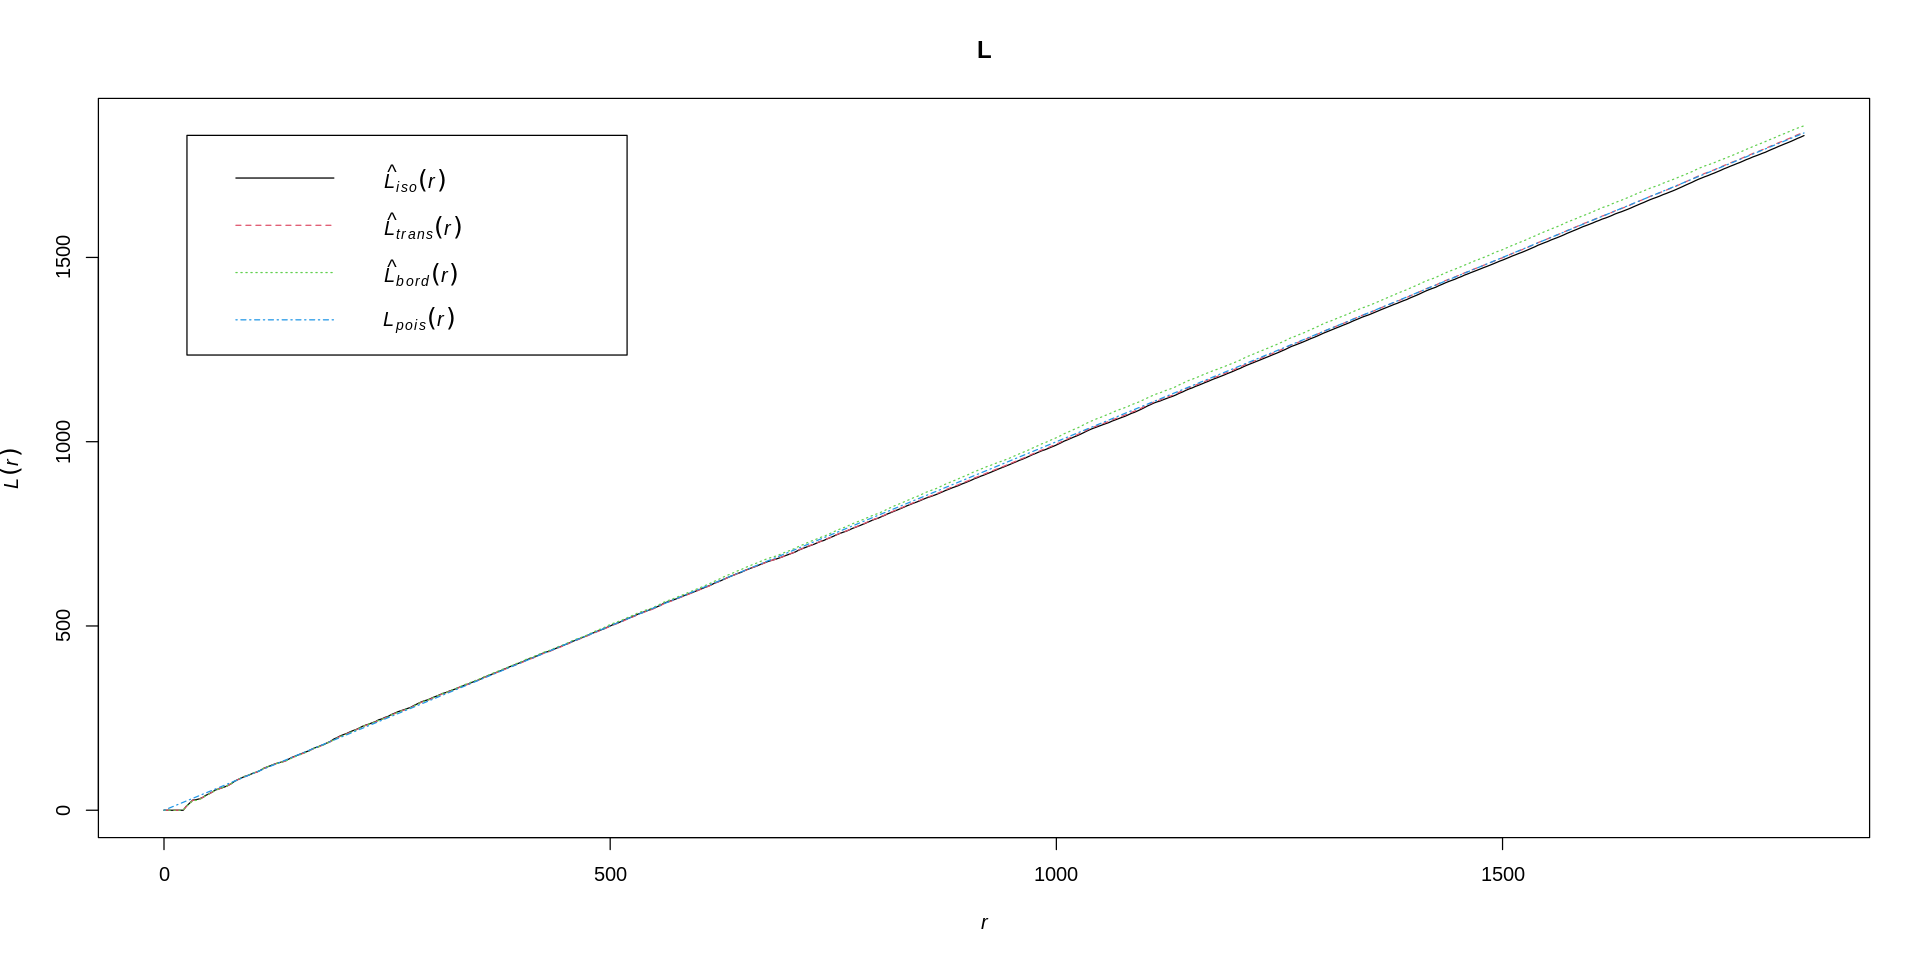

In [31]:
L <- Lest(cuad)
plot(L)

Generating 100 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.


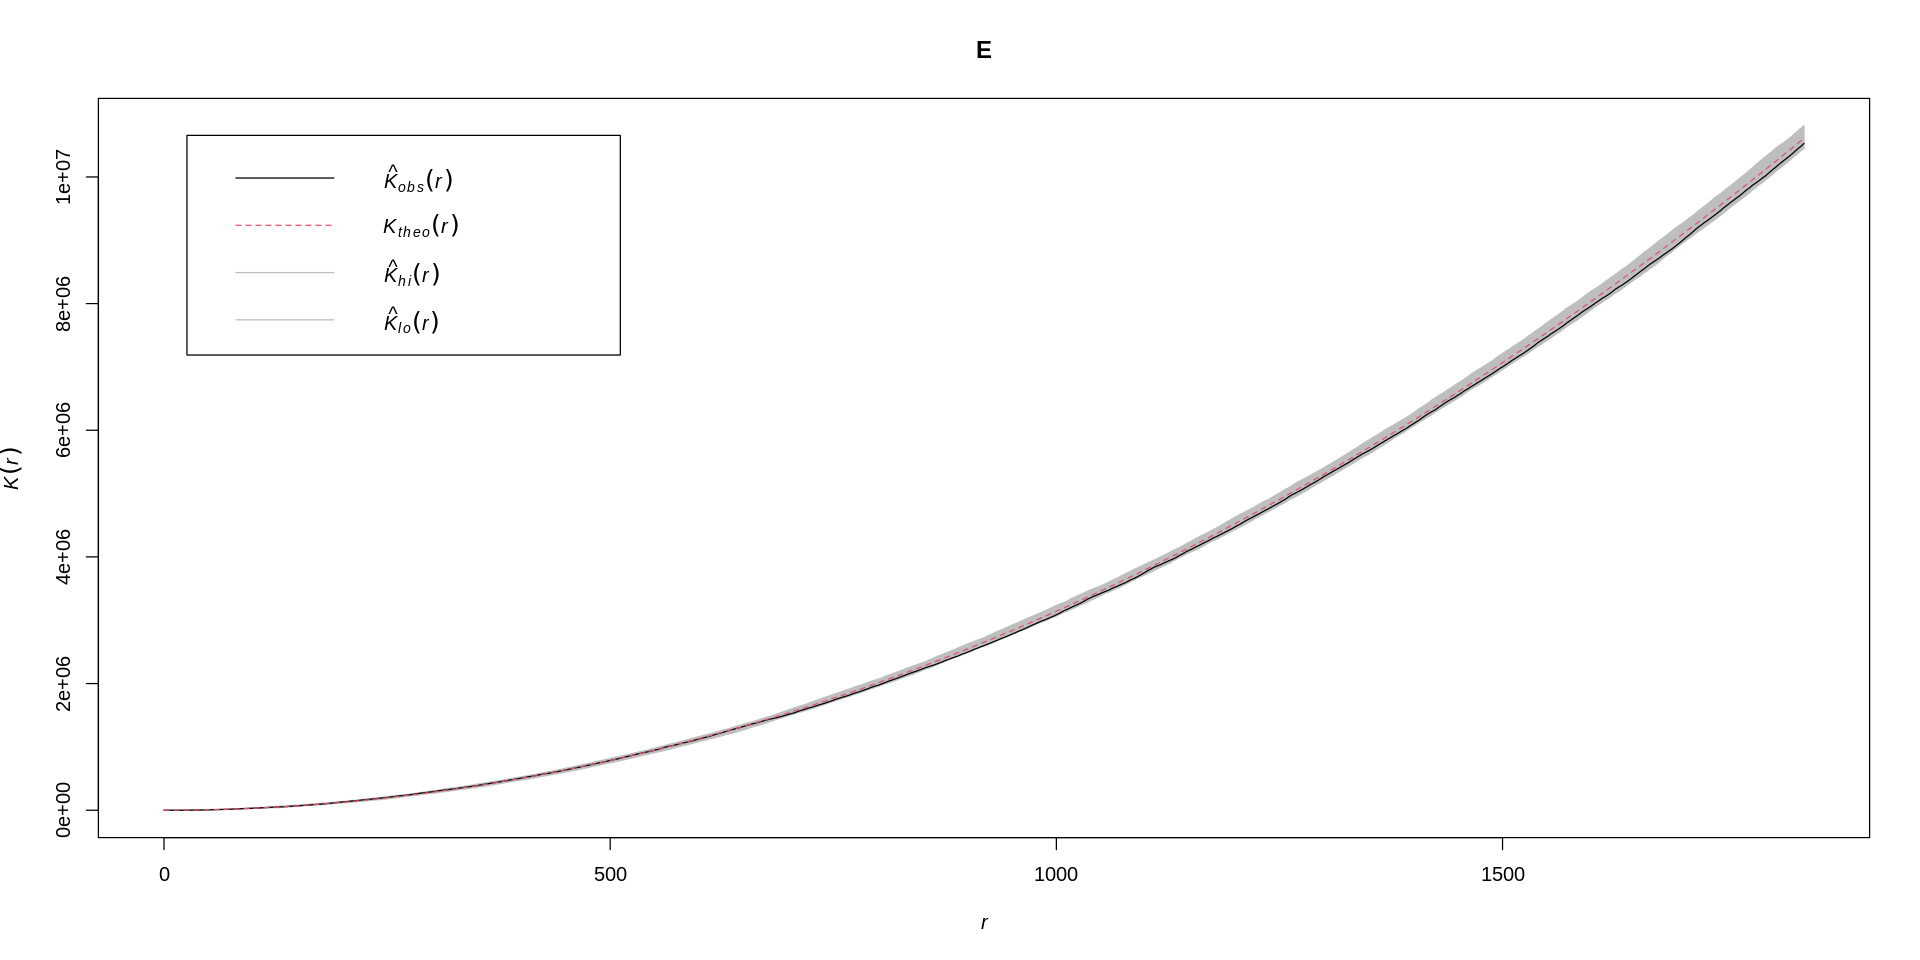

In [32]:
E <- envelope(cuad, Kest,nsim=100)
plot(E)

Generating 100 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.


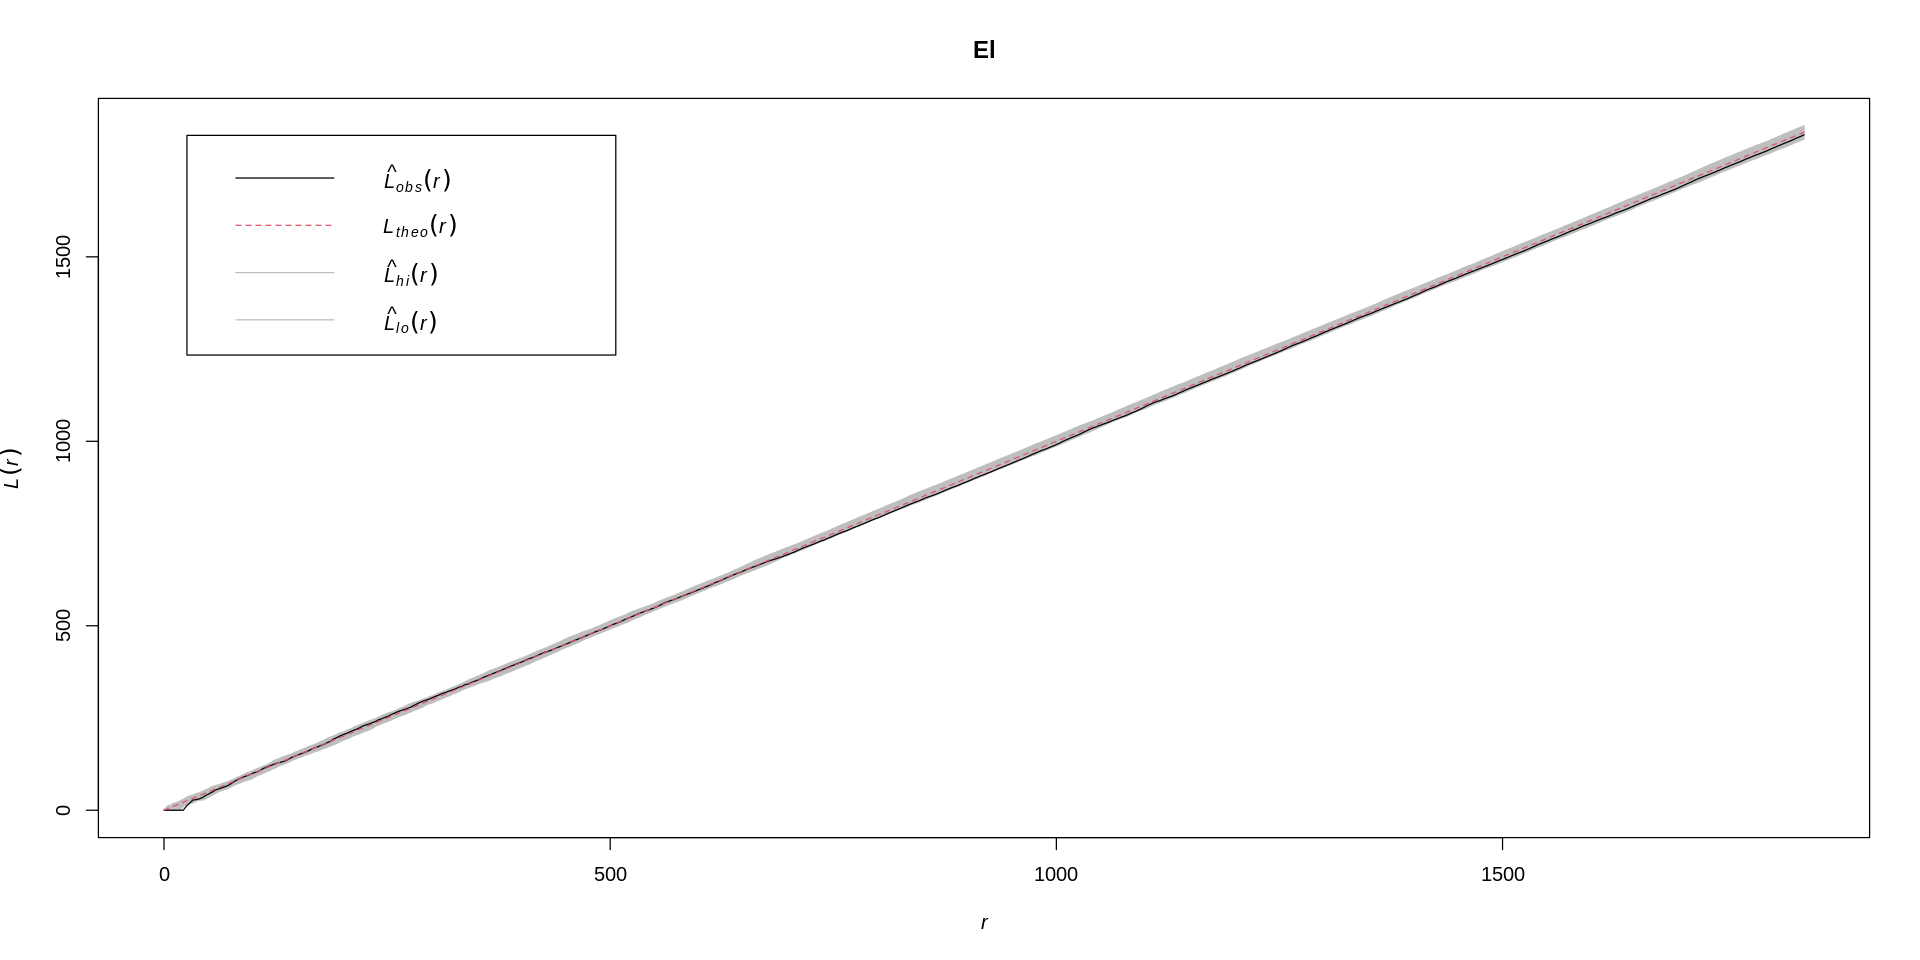

In [ ]:
El <- envelope(cuad, Lest,nsim=100)
plot(El)

## Preguntas/ejercicios

Utilice el resultado de estas preguntas para complementar el taller

1. ¿Qué pasa si al hacer las estimaciones con el conjunto aleatorio selecciona un número diferente de puntos que el conjunto de puntos regulares? ¿Qué pasa si elije 1.000? ¿O si elige 3.000?
1. ¿Qué pasa si ahora realiza la selección según la cobertura de suelo que le corresponde a cada punto?
1. ¿Qué pasas si intenta predecir el EVI o el NDVI por medio de un modelo lineal de mínimos ordinarios? (función `lm` en R).